## **GRAD-PROJECT( Sales Data Analysis)**

**Importing** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/socbiz/Flipkart_orders.csv')



<ipython-input-2-3510a745166e>:1: DtypeWarning: Columns (24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/socbiz/Flipkart_orders.csv')


In [3]:

df.head()


,order_item_id,order_id,fulfilment_source,fulfilment_type,order_date,order_approval_date,order_item_status,sku,fsn,product_title,...,deliver_by_date,order_delivery_date,delivery_sla_breached,order_service_completion_date,service_by_date,service_completion_sla,service_sla_breached,account_id,create_time,update_time
0,OI:12560191039333800,OD125601910393338000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:49,2024-01-25 10:31:49
1,OI:12560502154330800,OD125605021543308000,Seller,NON_FBF,2022-07-30 00:00:00,2022-07-30 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
2,OI:12560502154330801,OD125605021543308000,Seller,NON_FBF,2022-08-05 00:00:00,2022-08-05 00:00:00,RETURNED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:51,2024-01-25 10:31:51
3,OI:12561169342802700,OD125611693428027000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN_BLACK,"STSGGZFCFY2TX4GF""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:30:18,2024-01-25 10:30:18
4,OI:12561404691585900,OD125614046915859000,Seller,NON_FBF,2022-07-31 00:00:00,2022-07-31 00:00:00,DELIVERED,STYLUS_PEN,"STSGGHS2XG5RNZHR""""""",Kingone Upgraded Stylus Pen iPad Pencil Ultra ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2024-01-25 10:31:48,2024-01-25 10:31:48


In [4]:
df.shape

(83667, 42)

**Dropping** **unwanted** **columns**

In [5]:

df.drop(['serial_no_imei' , 'cancellation_sub_reason' , 'cancellation_reason' , 'forward_logistics_form_no', 'forward_logistics_form' , 'delivery_logistics_partner' , 'service_sla_breached' , 'service_completion_sla' , 'service_by_date' , 'order_service_completion_date'], axis=1, inplace=True)

In [6]:

df.isnull().sum()

,0
order_item_id,0
order_id,0
fulfilment_source,52
fulfilment_type,0
order_date,0
order_approval_date,424
order_item_status,0
sku,0
fsn,0
product_title,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83667 entries, 0 to 83666
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   order_item_id                     83667 non-null  object
 1   order_id                          83667 non-null  object
 2   fulfilment_source                 83615 non-null  object
 3   fulfilment_type                   83667 non-null  object
 4   order_date                        83667 non-null  object
 5   order_approval_date               83243 non-null  object
 6   order_item_status                 83667 non-null  object
 7   sku                               83667 non-null  object
 8   fsn                               83667 non-null  object
 9   product_title                     83667 non-null  object
 10  order_quantity                    83667 non-null  int64 
 11  pickup_logistics_partner          79674 non-null  object
 12  delivery_tracking_

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_delivery_date'] = pd.to_datetime(df['order_delivery_date'])
df['order_approval_date'] = pd.to_datetime(df['order_approval_date'])
df['deliver_by_date'] = pd.to_datetime(df['deliver_by_date'])
df['order_return_approval_date'] = pd.to_datetime(df['order_return_approval_date'])
df['order_cancellation_date'] = pd.to_datetime(df['order_cancellation_date'])




**Trends in Purchase Dates**

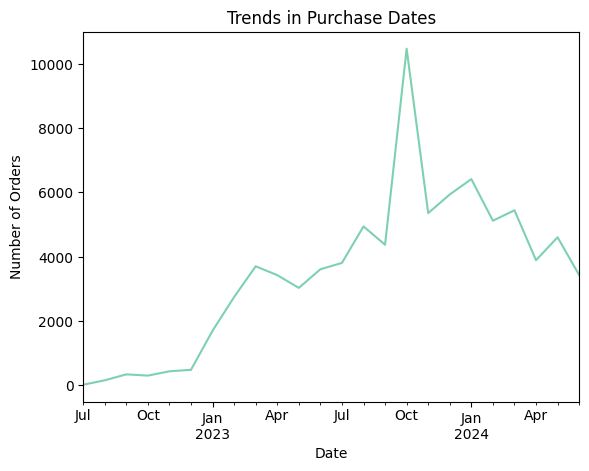

In [10]:
purchase_trends = df['order_date'].dt.to_period('M').value_counts().sort_index()
purchase_trends.plot(kind='line', title='Trends in Purchase Dates', ylabel='Number of Orders', xlabel='Date' , color= '#7dd1b0')
plt.show()


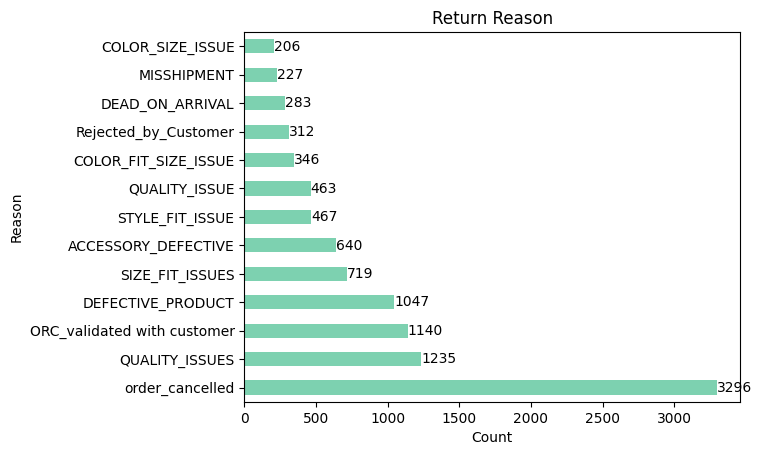

In [11]:
ax =df['return_reason'].value_counts().sort_values(ascending=False).head(13).plot(kind='barh' , color = '#7dd1b0')
plt.title('Return Reason')
plt.ylabel('Reason')
plt.xlabel('Count')
for labels in ax.containers:
    ax.bar_label(labels)

plt.show()

**Trends in return approval  Dates**

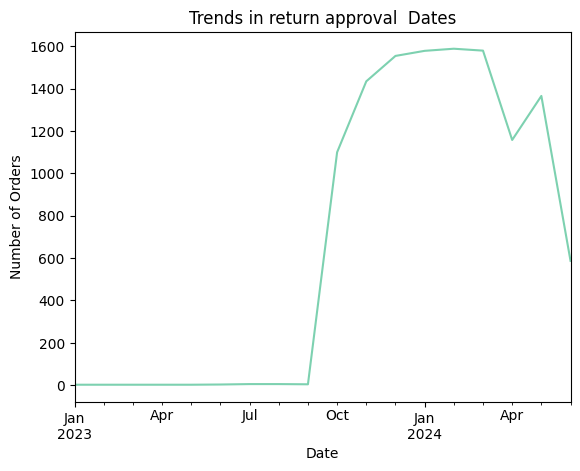

In [12]:
return_trends = df['order_return_approval_date'].dt.to_period('M').value_counts().sort_index()
return_trends.plot(kind='line', title='Trends in return approval  Dates', ylabel='Number of Orders', xlabel='Date' , color= '#7dd1b0')
plt.show()


**Trends in cancellation Dates**

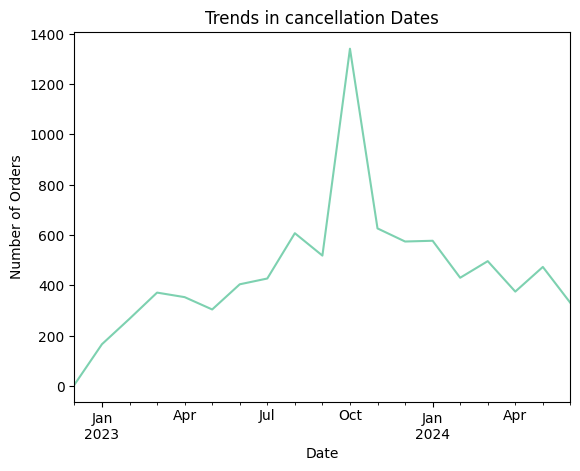

In [13]:

cancellation_trends = df['order_cancellation_date'].dt.to_period('M').value_counts().sort_index()
cancellation_trends.plot(kind='line', title='Trends in cancellation Dates', ylabel='Number of Orders', xlabel='Date' , color= '#7dd1b0')
plt.show()


In [14]:
df['month'] = df['order_date'].dt.month


**BEST MONTH FOR SALE?**

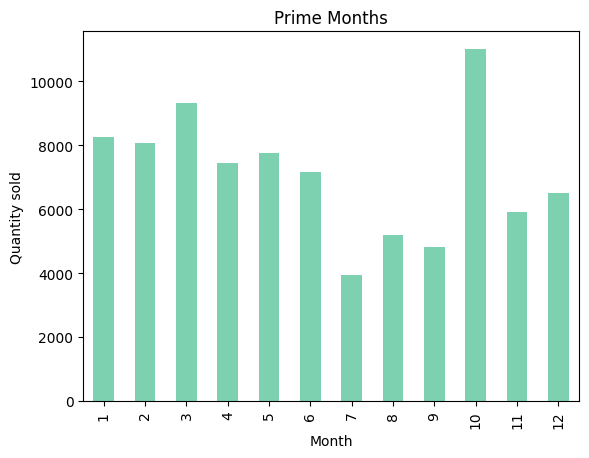

In [15]:
df.groupby('month')['order_quantity'].sum().plot(kind = 'bar' , color = '#7dd1b0')
plt.title('Prime Months')
plt.xlabel('Month')
plt.ylabel('Quantity sold')
plt.show()

**Best time to display advertisment?**

In [16]:
df['hour'] = df['order_date'].dt.hour

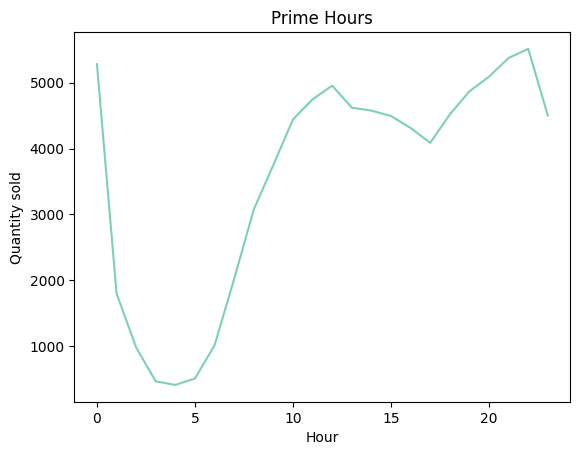

In [17]:
df.groupby('hour')['order_quantity'].sum().plot(kind = 'line' , color = '#7dd1b0')
plt.title('Prime Hours')
plt.xlabel('Hour')
plt.ylabel('Quantity sold')
plt.show()

**Distribution of Shipping Times (Days)**

<ipython-input-18-ce500f3e2fee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipkart_orders['shipping_time'] = (flipkart_orders['order_delivery_date'] - flipkart_orders['order_date']).dt.days


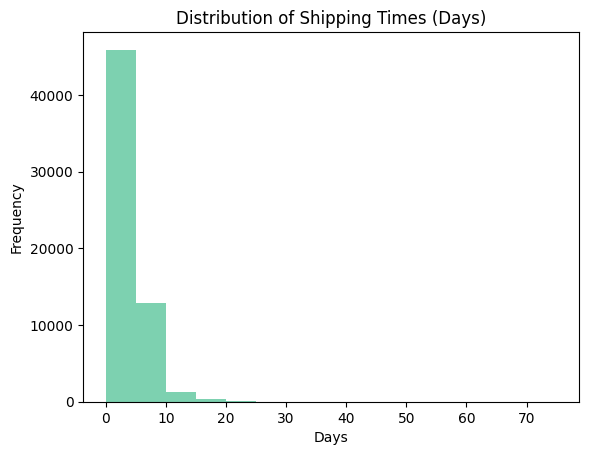

In [18]:
flipkart_orders = df.dropna(subset=['order_date', 'order_delivery_date'])
flipkart_orders['shipping_time'] = (flipkart_orders['order_delivery_date'] - flipkart_orders['order_date']).dt.days
flipkart_orders['shipping_time'].plot(kind='hist', bins=np.arange(0 , 80, 5), title='Distribution of Shipping Times (Days)' , color = '#7dd1b0')
plt.xlabel('Days')
plt.show()

In [19]:
flipkart_orders['shipping_time'].describe()

,shipping_time
count,61202.000000
mean,3.279991
std,2.700474
min,-1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,87.000000


In [20]:
df['sku'].value_counts().sort_values(ascending=False).head(15)

,count
sku,
STYLUS_WHI,9434
STYLUS_PEN,7716
Stylus_ID713_White,6815
FSB-Stylus-Map,6373
Stylus Black,4552
Stylus_ID713_Black,3690
STYLUS_PEN_BLACK,2925
SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,2912
TRIPLE_SOFA_COVER_BLEND_GEO,2537


**Order Item Status**

In [21]:
df.order_item_status.value_counts()

,count
order_item_status,
DELIVERED,49928
RETURNED,24009
CANCELLED,8395
RETURN_REQUESTED,541
READY_TO_SHIP,485
REJECTED,248
APPROVED,59
APPROVAL_HOLD,1
UNDELIVERED,1


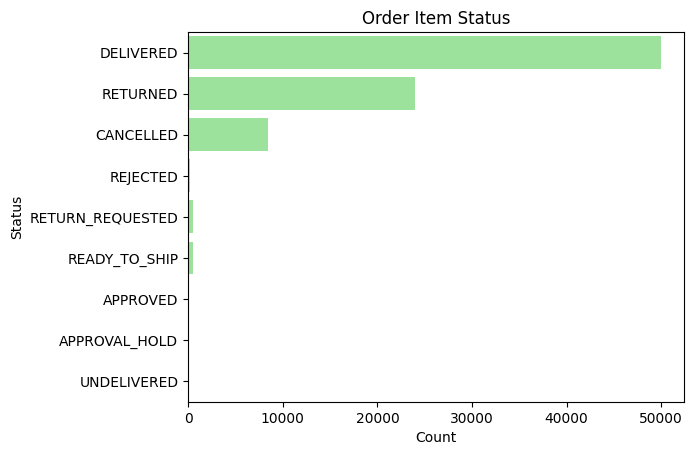

In [ ]:
sns.countplot(df['order_item_status'] , color='lightgreen')

plt.title('Order Item Status')
plt.ylabel('Status')
plt.xlabel('Count')


plt.show()

**Fulfillment** **Source** **Distribution**

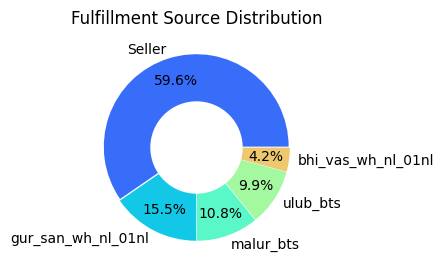

In [22]:
explode=[0.01,0.01,0.01 , 0.01 , 0.01]
palette_color = sns.color_palette('rainbow')
df['fulfilment_source'].value_counts().plot(kind='pie',figsize=(5,3),autopct='%1.1f%%',pctdistance=0.75,colors=palette_color,explode=explode,ylabel='',title='Fulfillment Source Distribution')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

**Fulfilment Type**

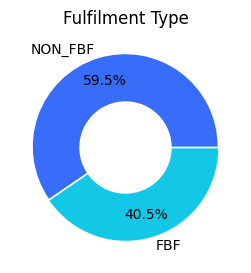

In [23]:
explode=[0.01,0.01]
palette_color = sns.color_palette('rainbow')
df['fulfilment_type'].value_counts().plot(kind='pie',figsize=(5,3),autopct='%1.1f%%',pctdistance=0.75,colors=palette_color,explode=explode,ylabel='',title='Fulfilment Type')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

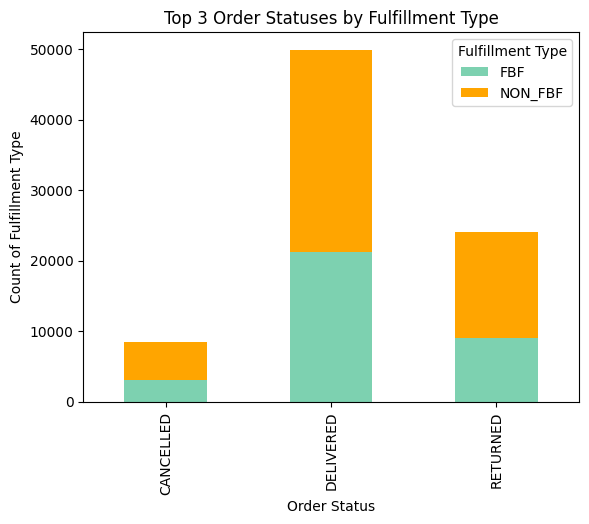

In [25]:
top_statuses = ['DELIVERED', 'CANCELLED', 'RETURNED']
df_filtered = df[df['order_item_status'].isin(top_statuses)]

df_grouped = df_filtered.groupby(['order_item_status', 'fulfilment_type']).size().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, color=['#7dd1b0', 'orange' ])
plt.xlabel('Order Status')
plt.ylabel('Count of Fulfillment Type')
plt.title('Top 3 Order Statuses by Fulfillment Type')
plt.legend(title='Fulfillment Type')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [26]:
df.sku.unique()

array(['STYLUS_PEN', 'STYLUS_PEN_BLACK', 'stylus_pen_pack_of_2',
       'POLAR_BLANKET_PLANE_MULTI_Shopsy', 'Chair Cover GREY SET4 Shopsy',
       'Electric_kettle-New', 'ARTIC_MINI_COOLER_BLUE_SHOPSY',
       'Chair Cover PLAIN MUST SET4 Shop',
       'MINI_AIR_ COOLER_GREEN_SHOPSY', 'HAIR_DRYER_MULTI_2',
       'MINI_AIR_ COOLER_BLUE_SHOPSY', 'SCREWDRIVER_8IN1_',
       '3d Mobile stand-1', 'Chair Cover PLAIN BRO SET6 Shopsy',
       'Mosquito-Net_Blue', 'ZL1013-A1', 'ZL1011-7_new',
       'Chair Cover PLAIN MUSTARD SET6', 'SINGLE_SOFA_COVER_MULTI_PRISM',
       'Chair Cover PLAIN BLA SET6 Shopsy',
       'SCARLETT_ELECTRIC_KETTLE_2LT_SHOPSY',
       'VEHICLE_BLACKBOX_VIDEO_CARDVR',
       'Chair Cover PLAIN BLA SET4 Shopsy', 'FLYING-SPINNER-BALL-New',
       'POLAR_BLANKET_PLANE_PACK3', 'MINI_AIR_ COOLER_BLACK_SHOPSY',
       'ARTIC_MINI_COOLER_BLACK_SHOPSY', 'RECHARGEABLE_FAN_BLUE_SHOPSY',
       'DOUBLE_SOFA_COVER_BLA_PRISM Sh', 'MOSQUITO_NET_TENT_BLU_3',
       'RECHARGEABLE_FAN_

***Sorting the differnt category products ***

In [28]:
df['sku'] = df['sku'].str.lower()

In [29]:
stylus_sales = df.groupby('sku')['order_quantity'].sum().loc[lambda x: x.index.str.contains('stylus', case=False)].sort_values(ascending=False)



In [30]:
stylus_sales

,order_quantity
sku,
stylus_whi,9495
stylus_pen,7786
stylus_id713_white,6850
fsb-stylus-map,6398
stylus black,4579
stylus_id713_black,3712
stylus_pen_black,2945
stylus_pen_p8,2460
fs-styluspen-2w-black,2194


In [31]:
stylus_sales.shape

(24,)

In [32]:
stylus_sales.sum()

50091

In [33]:
sofa_df = df[df['sku'].str.contains('sofa' , case = False)]

sofa_sales = df.groupby('sku')['order_quantity'].sum() \
                 .loc[lambda x: x.index.str.contains('sofa', case=False)] \
                 .sort_values(ascending=False) \





In [34]:
sofa_sales.shape

(93,)

In [35]:
sofa_sales.sum()

19388

In [36]:
top_two_sku = stylus_sales.sum() + sofa_sales.sum()
top_two_sku

69479

In [37]:
df.order_quantity.sum()

85405

**Major Categories sold by flipkart**

Text(0, 0.5, 'Quantity sold')

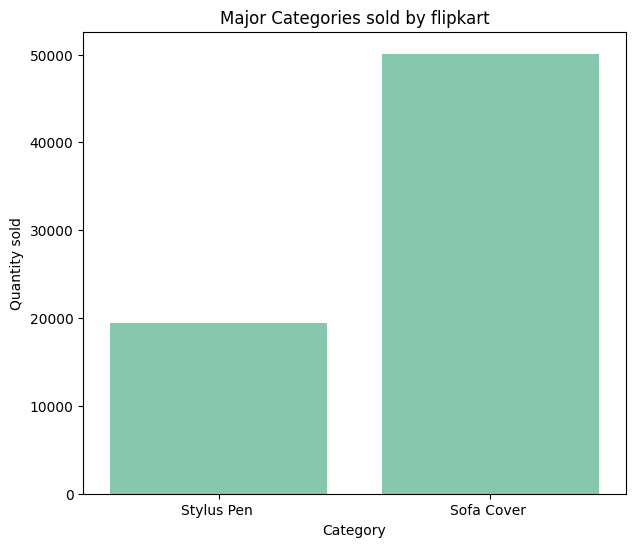

In [38]:
plt.figure(figsize=(7, 6))
ax =sns.barplot(x=['Stylus Pen ' , 'Sofa Cover ' ] , y = [sofa_sales.sum() , stylus_sales.sum()] , color = '#7dd1b0')
plt.title('Major Categories sold by flipkart')
plt.xlabel('Category')
plt.ylabel('Quantity sold')

**Order** **Item** **Status** **For** **Category** **Sofa**

In [39]:

sofa_df = df[df['sku'].str.contains('sofa', case=False)]
sofa_sales_status = sofa_df.groupby('order_item_status')['order_quantity'].sum()
print(sofa_sales_status)


order_item_status
APPROVED               20
CANCELLED            1417
DELIVERED           11716
READY_TO_SHIP         174
REJECTED               52
RETURNED             5787
RETURN_REQUESTED      221
UNDELIVERED             1
Name: order_quantity, dtype: int64


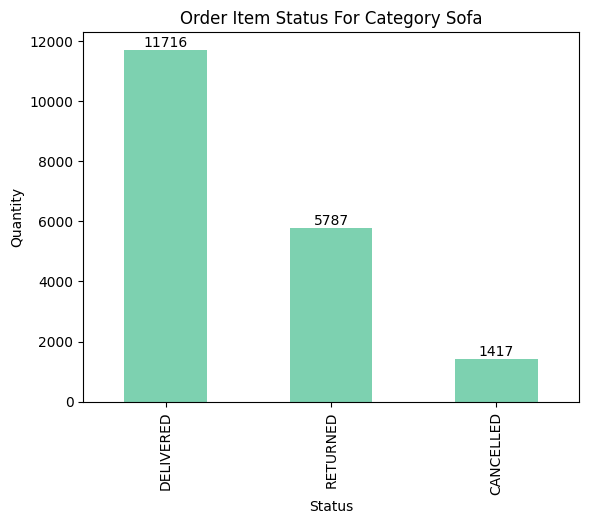

Axes(0.125,0.11;0.775x0.77)


In [40]:

sofa_df = df[df['sku'].str.contains('sofa', case=False)]
ax = sofa_sales_status = sofa_df.groupby('order_item_status')['order_quantity'].sum().sort_values(ascending=False).head(3).plot(kind='bar' , color = '#7dd1b0')
plt.title('Order Item Status For Category Sofa')
plt.xlabel('Status')
plt.ylabel('Quantity')
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()
print(sofa_sales_status)

**Order Item Status For Category Stylus Pen**

In [41]:
stylus_df = df[df['sku'].str.contains('stylus', case=False)]
stylus_sales_status = stylus_df.groupby('order_item_status')['order_quantity'].sum()
print(stylus_sales_status)


order_item_status
APPROVAL_HOLD           1
APPROVED               20
CANCELLED            5518
DELIVERED           30497
READY_TO_SHIP         162
REJECTED              122
RETURNED            13535
RETURN_REQUESTED      236
Name: order_quantity, dtype: int64


**Quantity of Items Sold Over Time**

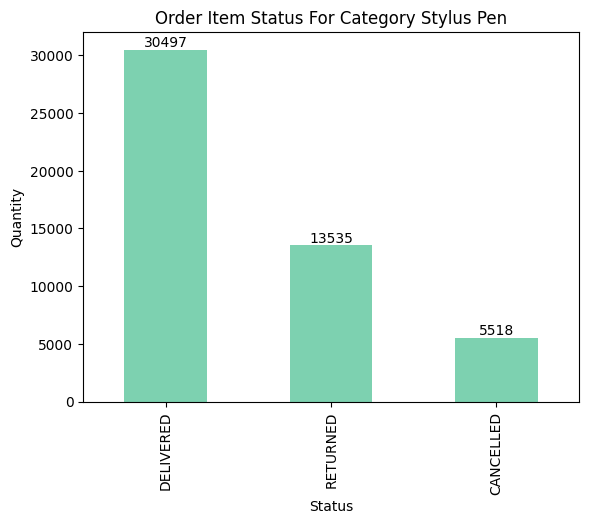

Axes(0.125,0.11;0.775x0.77)


In [42]:
stylus_df = df[df['sku'].str.contains('stylus', case=False)]
ax =stylus_sales_status = stylus_df.groupby('order_item_status')['order_quantity'].sum().sort_values(ascending=False).head(3).plot(kind='bar' , color = '#7dd1b0')
plt.title('Order Item Status For Category Stylus Pen')
plt.xlabel('Status')
plt.ylabel('Quantity')
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()
print(stylus_sales_status)


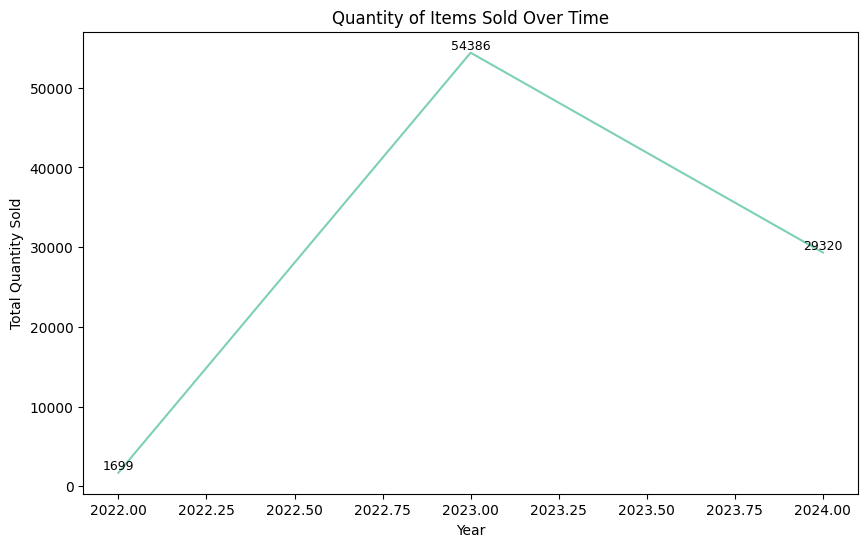

In [43]:
df.order_date = pd.to_datetime(df.order_date)
df['year'] = df.order_date.dt.year
yearly_quantity_sold = df.groupby('year')['order_quantity'].sum()

fig , ax = plt.subplots(figsize = (10 , 6))
sns.lineplot(x = yearly_quantity_sold.index , y = yearly_quantity_sold.values , color = '#7dd1b0' )

for i, value in enumerate(yearly_quantity_sold.values):
    ax.text(yearly_quantity_sold.index[i], value,
            f"{int(value)}",
            ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.title('Quantity of Items Sold Over Time')
plt.show()



# **AMAZON**

In [45]:
import pandas as pd

dm = pd.read_csv('/content/drive/MyDrive/socbiz/amazon_orders_new(1).csv', on_bad_lines='skip')


<ipython-input-45-4c41184913d0>:3: DtypeWarning: Columns (16,17,18,19,22,26,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dm = pd.read_csv('/content/drive/MyDrive/socbiz/amazon_orders_new(1).csv', on_bad_lines='skip')


In [46]:
dm.head()

,amazon_order_id,merchant_order_id,purchase_date,last_updated_date,order_status,fulfillment_channel,sales_channel,order_channel,url,ship_service_level,...,purchase_order_number,price_designation,fulfilled_by,is_iba,is_replacement_order,is_exchange_order,original_order_id,account_id,create_time,update_time
0,171-0003648-9448303,NaN,2023-12-16 06:56:41,2023-12-23 09:46:53,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,3.0,2024-01-18 03:04:28,2024-01-18 03:04:28
1,171-0007507-1641150,NaN,2022-11-07 12:21:38,2022-11-14 08:23:39,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
2,171-0009886-8466729,NaN,2022-11-20 15:35:45,2022-11-26 05:08:52,Shipped - Delivered to Buyer,Merchant,Amazon.in,WebsiteOrderChannel,NaN,Standard,...,NaN,NaN,Easy Ship,0.0,0,0,NaN,4.0,2024-01-18 03:10:56,2024-01-18 03:10:56
3,171-0012199-2736313,171-0012199-2736313,2024-03-29 12:10:38,2024-03-30 04:42:04,Shipped,Amazon,Amazon.in,NaN,NaN,Expedited,...,NaN,NaN,NaN,0.0,0,0,NaN,3.0,2024-04-13 10:08:25,2024-04-13 10:08:25
4,171-0014290-9993133,NaN,2023-03-17 14:30:17,2023-03-17 19:29:04,Cancelled,Merchant,Amazon.in,WebsiteOrderChannel,NaN,NextDay,...,NaN,NaN,NaN,0.0,0,0,NaN,5.0,2024-01-18 04:17:16,2024-01-18 04:17:16


In [47]:
dm.shape

(46292, 40)

In [48]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46292 entries, 0 to 46291
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   amazon_order_id          46292 non-null  object 
 1   merchant_order_id        25004 non-null  object 
 2   purchase_date            46292 non-null  object 
 3   last_updated_date        46292 non-null  object 
 4   order_status             46292 non-null  object 
 5   fulfillment_channel      46292 non-null  object 
 6   sales_channel            46292 non-null  object 
 7   order_channel            21288 non-null  object 
 8   url                      0 non-null      float64
 9   ship_service_level       46292 non-null  object 
 10  product_name             46292 non-null  object 
 11  sku                      46292 non-null  object 
 12  asin                     46269 non-null  object 
 13  item_status              42849 non-null  object 
 14  quantity              

In [49]:

dm.purchase_date = pd.to_datetime(dm.purchase_date)
dm['year'] = dm.purchase_date.dt.year
dm['month'] = dm.purchase_date.dt.month
dm['hour'] = dm.purchase_date.dt.hour

dm.quantity = pd.to_numeric(dm.quantity, errors='coerce')

**Prime Hours**

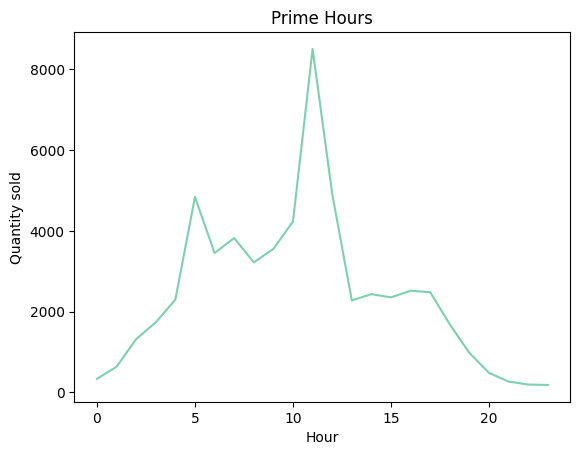

In [50]:
dm.groupby('hour')['quantity'].sum().plot(kind = 'line' , color = '#7dd1b0')
plt.title('Prime Hours')
plt.xlabel('Hour')
plt.ylabel('Quantity sold')
plt.show()

**Prime Months**

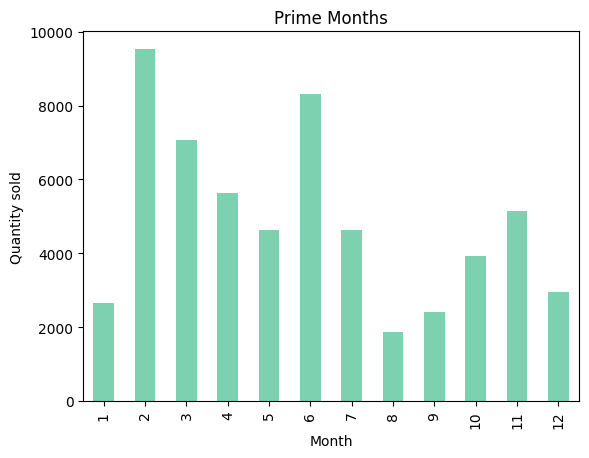

In [51]:
dm.groupby('month')['quantity'].sum().plot(kind = 'bar' , color = '#7dd1b0')
plt.title('Prime Months')
plt.xlabel('Month')
plt.ylabel('Quantity sold')
plt.show()

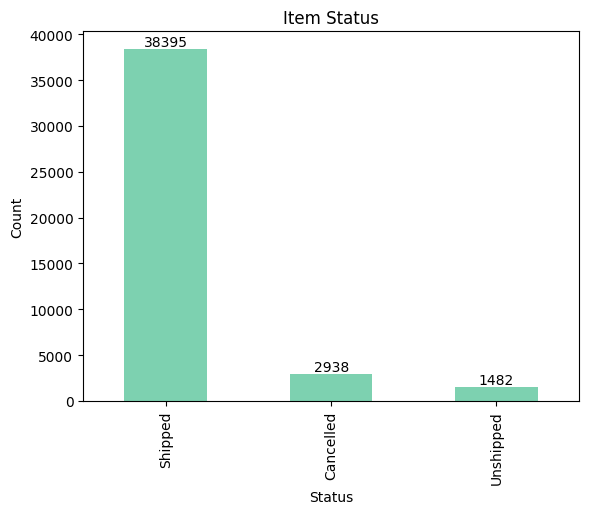

In [52]:
ax = dm.item_status.value_counts().sort_values(ascending = False).head(3).plot(kind = 'bar' , color = '#7dd1b0')
plt.title('Item Status')
plt.xlabel('Status')
plt.ylabel('Count')
for labels in ax.containers:
    ax.bar_label(labels)
plt.show()

In [53]:
dm.puchase_date = pd.to_datetime(dm.purchase_date)
dm['year'] = dm.purchase_date.dt.year
dm.last_updated_date = pd.to_datetime(dm.last_updated_date)


<ipython-input-53-7e9ed9c8b4c2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dm.puchase_date = pd.to_datetime(dm.purchase_date)


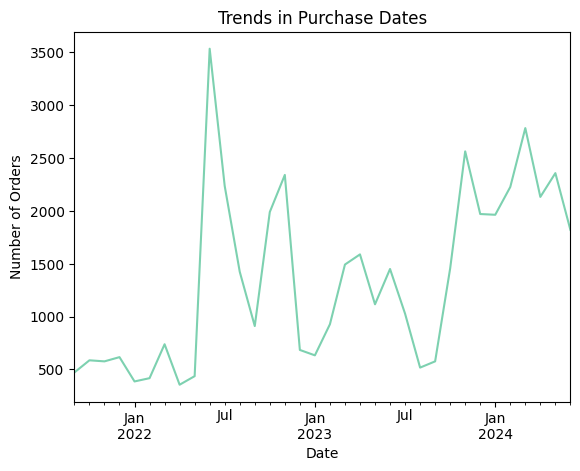

In [54]:
purchase_trends = dm['purchase_date'].dt.to_period('M').value_counts().sort_index()
purchase_trends.plot(kind='line', title='Trends in Purchase Dates', ylabel='Number of Orders', xlabel='Date' , color= '#7dd1b0')
plt.show()


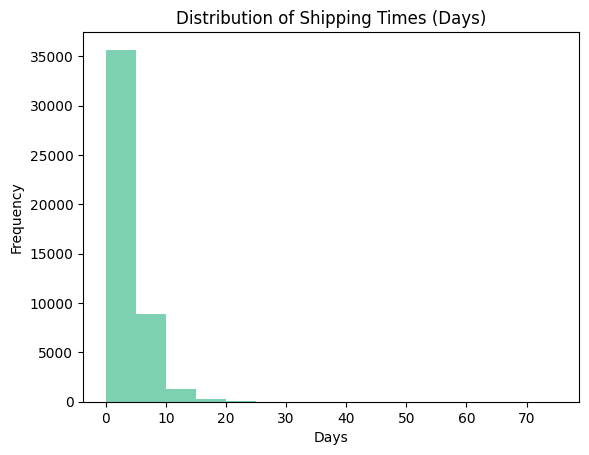

In [55]:
amazon_orders = dm.dropna(subset=['purchase_date', 'last_updated_date'])
amazon_orders['shipping_time'] = (amazon_orders['last_updated_date'] - amazon_orders['purchase_date']).dt.days
amazon_orders['shipping_time'].plot(kind='hist', bins=np.arange(0 , 80, 5), title='Distribution of Shipping Times (Days)' , color = '#7dd1b0')
plt.xlabel('Days')
plt.show()

52.20 percent of orders are shipped in first 10 days with avaerage of 3 days  

The histogram is likely to be skewed to the left, indicating that most orders are shipped within a short period, typically within 10-20 days.

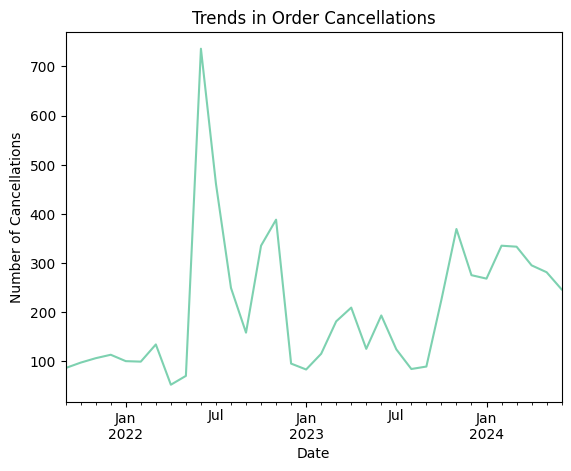

In [56]:
dm['purchase_date'] = pd.to_datetime(dm['purchase_date'])
dm['last_updated_date'] = pd.to_datetime(dm['last_updated_date'])
canceled_orders = dm[dm['order_status'] == 'Cancelled']
cancellation_trends = canceled_orders['purchase_date'].dt.to_period('M').value_counts().sort_index()

import matplotlib.pyplot as plt
cancellation_trends.plot(kind='line', title='Trends in Order Cancellations', ylabel='Number of Cancellations', xlabel='Date' , color= '#7dd1b0')
plt.show()


In [57]:
dm['item_tax'] =pd.to_numeric(dm['item_tax'], errors='coerce').fillna(0)
dm['shipping_tax'] =pd.to_numeric(dm['shipping_tax'], errors='coerce').fillna(0)
dm['gift_wrap_tax'] =pd.to_numeric(dm['gift_wrap_tax'], errors='coerce').fillna(0)
dm['total_tax'] = (dm['item_tax'] * dm['quantity']) + (dm['shipping_tax'] * dm['quantity']) + (dm['gift_wrap_tax'] * dm['quantity'])

In [58]:
dm.total_tax.sum()

3228098.87

In [59]:
dm['item_promotion_discount'] =pd.to_numeric(dm['item_promotion_discount'], errors='coerce').fillna(0)
dm['ship_promotion_discount'] =pd.to_numeric(dm['ship_promotion_discount'], errors='coerce').fillna(0)
dm['total_promotion_discount'] = (dm['item_promotion_discount'] * dm['quantity']) + (dm['ship_promotion_discount'] * dm['quantity'])

In [60]:
dm.total_promotion_discount.sum()

889554.4800000001

In [61]:

dm['item_price'] = pd.to_numeric(dm['item_price'], errors='coerce').fillna(0)
dm['quantity'] = pd.to_numeric(dm['quantity'], errors='coerce').fillna(0)
dm['shipping_price'] = pd.to_numeric(dm['shipping_price'], errors='coerce').fillna(0)
dm['gift_wrap_price'] = pd.to_numeric(dm['gift_wrap_price'], errors='coerce').fillna(0)


dm['Revenue'] = (dm['item_price'] * dm['quantity'])-  dm['total_promotion_discount']

In [62]:

dm.Revenue.sum()

58842407.059999995

In [63]:
dm['purchase_date'] = pd.to_datetime(dm['purchase_date'])
dm['year'] = dm.purchase_date.dt.year
dm['last_updated_date'] = pd.to_datetime(dm['last_updated_date'])



In [64]:
dm['quantity'] = pd.to_numeric(dm['quantity'], errors='coerce')


dm. quantity.sum()

58699.0

In [65]:
dm.sku.nunique()

1819

In [66]:
dm.sku.unique()

array(['SOFA_COVER_BLUE_DROP_Pack3+1+1', 'PU_BELT_BLA',
       'WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1', ...,
       'PL1096_Pack2_13-14_N_fba', 'PL1051_Pack2_11-12_FBA',
       'PL1212B_Pack1-19_fba'], dtype=object)

In [67]:
sofa_sales.sum()

19388

In [68]:
dm.sku.str.upper()
cooler_dm = dm[dm['sku'].str.contains('COOLER' , case = False)]

cooler_sales = dm.groupby('sku')['Revenue'].sum() \
                 .loc[lambda x: x.index.str.contains('COOLER', case=False)] \
                 .sort_values(ascending=False) \




In [69]:
cooler_sales.sum()

4268147.3

In [70]:
dm.sku.str.upper()
cloth_dm = dm[dm['sku'].str.contains('CLOTH' , case = False)]

cloth_sales = dm.groupby('sku')['Revenue'].sum() \
                 .loc[lambda x: x.index.str.contains('CLOTH', case=False)] \
                 .sort_values(ascending=False) \




In [71]:
cloth_sales.sum()

5167233.76

In [72]:
dm.something = (sofa_sales.sum() + cooler_sales.sum() + cloth_sales.sum())/dm.Revenue.sum() * 100

In [73]:
dm.something

16.06795087488387

***Major Revenue products sell by Amazon ***

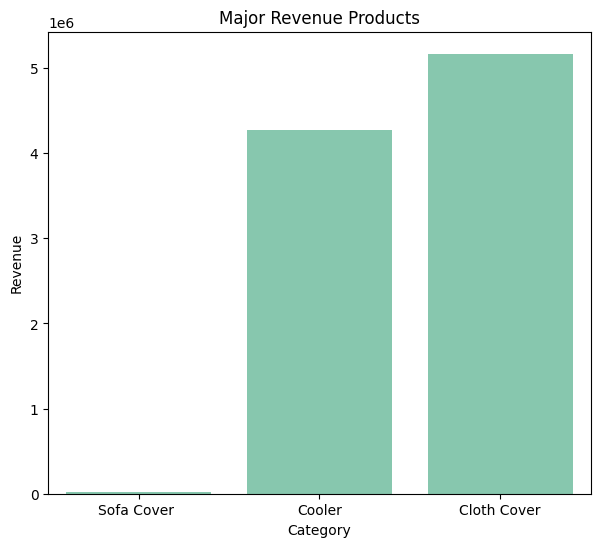

In [74]:

plt.figure(figsize=(7, 6))
sns.barplot(x=['Sofa Cover ' , 'Cooler' , 'Cloth Cover'] , y = [sofa_sales.sum() , cooler_sales.sum() , cloth_sales.sum()] , color = '#7dd1b0')
plt.title('Major Revenue Products')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

In [75]:
dm.sku.value_counts().sort_values(ascending=False).head(30)

,count
sku,
WC_SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,1963
ARTIC_MINI_COOLER_BLA,1740
PU_BELT_BLA,1088
Scarlet_Kettle_2L,883
MFN_SOFA_COVER_BLEND_GEOMETRIC_Pack3+1+1,846
WC_SOFA_COVER_Blue_Rhombus_Pack3+1+1,840
Cosmetic_Brush_Pack_of_1,814
WC_SOFA_COVER_BLU_DIAMOND_Pack3+1+1,803
MFN_WC_SOFA_COVER_Blue_Rhombus_Pack3+1+1,692


**Data Cleaning: Standardizing State Names**

In [78]:
dm.ship_state.str.upper()

,ship_state
0,GOA
1,MANIPUR
2,KARNATAKA
3,PUNJAB
4,UTTAR PRADESH
...,...
46287,DELHI
46288,DL
46289,DELHI
46290,DELHI


In [79]:
dm.ship_state.str.upper().unique()

array(['GOA', 'MANIPUR', 'KARNATAKA', 'PUNJAB', 'UTTAR PRADESH',
       'MAHARASHTRA', 'TELANGANA', 'MADHYA PRADESH', 'WEST BENGAL',
       'DELHI', 'RAJASTHAN', 'HARYANA', 'ANDHRA PRADESH', 'ODISHA',
       'KERALA', 'BIHAR', 'ASSAM', 'JHARKHAND', '2024-02-08 11:32:01',
       'TAMIL NADU', 'UTTARAKHAND', 'CHANDIGARH', 'GUJARAT',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'MEGHALAYA', 'CHHATTISGARH',
       'SIKKIM', 'PUDUCHERRY', nan, 'MIZORAM', 'CHATTISGARH',
       'JAMMU KASHMIR', 'LADAKH', 'MHARASHTRA', 'TAMILNADU', 'JK', 'KL',
       'DADRA AND NAGAR HAVELI AND DAMAN AND DIU', 'UP',
       'ANDAMAN & NICOBAR ISLANDS', '2024-02-08 11:31:39',
       'ANDHRAPRADESH', 'ARUNACHAL PRADESH', 'NAGALAND', 'NEW DELHI',
       'UTTARPRADESH', '2024-02-08 11:31:32', 'UP.', 'DL', 'AP', 'MH',
       'TRIPURA', 'KARANATAKA', 'UTTARPARDESH', 'U.P.', 'UTTRANCHAL',
       'WB', 'MADHYAPRADESH', 'GJ', 'TG', 'TELANGANA 0', 'U P', 'TN',
       'ANDAMAN AND NICOBAR ISLAND', 'LAKSHADWEEP', '2024-02

In [81]:
import pandas as pd

ship_state_mapping = {
    'DELHI': 'DELHI',
    'NEW DELHI': 'DELHI',
    'DL': 'DELHI',
    'DEHLI DEHLI': 'DELHI',
    'SOUTH DELHI': 'DELHI',
    'SOUTH WEST DELHI': 'DELHI',
    'UT': 'UTTARAKHAND',
    'UTTAR PRADESH': 'UTTAR PRADESH',
    'UP': 'UTTAR PRADESH',
    'U.P.': 'UTTAR PRADESH',
    'UTTARPRADESH': 'UTTAR PRADESH',
    'UTTER PRADESH': 'UTTAR PRADESH',
    'UTTER PARDESH': 'UTTAR PRADESH',
    'MHARASHTRA': 'MAHARASHTRA',
    'MH': 'MAHARASHTRA',
    'MAHARASTRA': 'MAHARASHTRA',
    'KARNATAKA': 'KARNATAKA',
    'KARANATAKA': 'KARNATAKA',
    'KA': 'KARNATAKA',
    'KARATAKA': 'KARNATAKA',
    'TELANGANA': 'TELANGANA',
    'TELANGAANA': 'TELANGANA',
    'TELANGANA 0': 'TELANGANA',
    'TG': 'TELANGANA',
    'ANDHRA PRADESH': 'ANDHRA PRADESH',
    'ANDHRAPRADESH': 'ANDHRA PRADESH',
    'AP': 'ANDHRA PRADESH',
    'APO': 'ANDHRA PRADESH',
    'ODISHA': 'ODISHA',
    'ODISA': 'ODISHA',
    'OR': 'ODISHA',
    'ORISSA': 'ODISHA',
    'WEST BENGAL': 'WEST BENGAL',
    'WB': 'WEST BENGAL',
    'BIHAR': 'BIHAR',
    'BR': 'BIHAR',
    'JHARKHAND': 'JHARKHAND',
    'JHARKHAND..(CONTACT NO.- 9431750952, 8292388391)': 'JHARKHAND',
    'JH': 'JHARKHAND',
    'JHARKAND': 'JHARKHAND',
    'CHHATTISGARH': 'CHHATTISGARH',
    'CHHATTSGARH': 'CHHATTISGARH',
    'CT': 'CHHATTISGARH',
    'HHATTSGARH': 'CHHATTISGARH',
    'MADHYA PRADESH': 'MADHYA PRADESH',
    'MP': 'MADHYA PRADESH',
    'MADHYAPRADESH': 'MADHYA PRADESH',
    'GUJARAT': 'GUJARAT',
    'GJ': 'GUJARAT',
    'HARYANA': 'HARYANA',
    'HR': 'HARYANA',
    'HIMACHAL PRADESH': 'HIMACHAL PRADESH',
    'HIMACHAL PARDESH': 'HIMACHAL PRADESH',
    'JAMMU & KASHMIR': 'JAMMU & KASHMIR',
    'JAMMU KASHMIR': 'JAMMU & KASHMIR',
    'JK': 'JAMMU & KASHMIR',
    'J&K': 'JAMMU & KASHMIR',
    'KERALA': 'KERALA',
    'KL': 'KERALA',
    'KARNATAKA': 'KARNATAKA',
    'KARANATAKA': 'KARNATAKA',
    'LADAKH': 'LADAKH',
    'MEGHALAYA': 'MEGHALAYA',
    'MAGHALAYA': 'MEGHALAYA',
    'MIZORAM': 'MIZORAM',
    'NAGALAND': 'NAGALAND',
    'PUNJAB': 'PUNJAB',
    'PB': 'PUNJAB',
    'RAJASTHAN': 'RAJASTHAN',
    'RJ': 'RAJASTHAN',
    'SIKKIM': 'SIKKIM',
    'TAMIL NADU': 'TAMIL NADU',
    'TAMILNADU': 'TAMIL NADU',
    'TN': 'TAMIL NADU',
    'TRIPURA': 'TRIPURA',
    'UTTARAKHAND': 'UTTARAKHAND',
    'UTTRAKHAND': 'UTTARAKHAND',
    'UTTRANCHAL': 'UTTARAKHAND',
    'CHANDIGARH': 'CHANDIGARH',
    'CHANDIGHAR': 'CHANDIGARH',
    'DADRA AND NAGAR HAVELI AND DAMAN AND DIU': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DADRA & NAGAR HAVELI': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'DADRA & NAGAR HAVELI AND DAMAN AND DIU': 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU',
    'ANDAMAN & NICOBAR ISLANDS': 'ANDAMAN & NICOBAR ISLANDS',
    'ANDAMAN AND NICOBAR ISLAND': 'ANDAMAN & NICOBAR ISLANDS',
    'LAKSHADWEEP': 'LAKSHADWEEP',
    'PONDICHERRY': 'PONDICHERRY',
    'GOA': 'GOA',
    'MANIPUR': 'MANIPUR',
    'ARUNACHAL PRADESH': 'ARUNACHAL PRADESH',
    'ASSAM': 'ASSAM',
    'CHHATTISGARH': 'CHHATTISGARH',
    'MADHYA PRADESH': 'MADHYA PRADESH',
    'NAGALAND': 'NAGALAND',
    'NEW DELHI': 'DELHI',
    'PUDUCHERRY': 'PUDUCHERRY',
    'RAJASTHAN': 'RAJASTHAN',
    'SIKKIM': 'SIKKIM',
    'TAMIL NADU': 'TAMIL NADU',
    'TELANGANA': 'TELANGANA',
    'TRIPURA': 'TRIPURA',
    'UTTAR PRADESH': 'UTTAR PRADESH',
    'UTTARAKHAND': 'UTTARAKHAND',
    'WEST BENGAL': 'WEST BENGAL'
}


states = dm.ship_state.map(ship_state_mapping)

dm['ship_state'] = states







In [ ]:

dm.ship_state.nunique()

36

**Top 5 states(in terms of volume)**

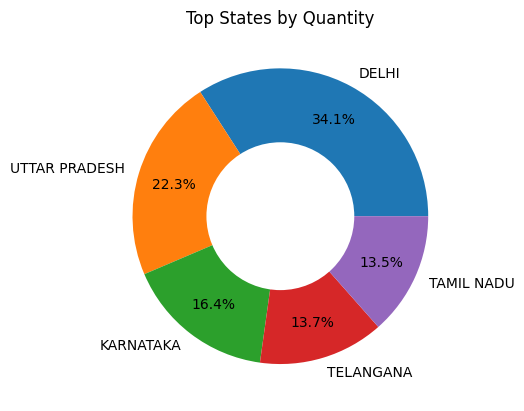

In [ ]:
dm.groupby('ship_state')['quantity'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='',title='Top States by Quantity' )
plt.title('Top States by Quantity')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**Top 5 states(in terms of Revenue)**

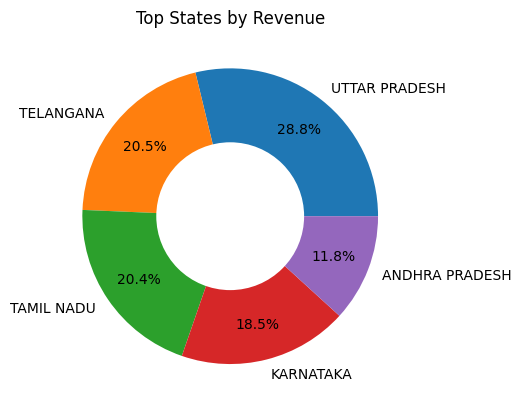

In [84]:


dm['Revenue'] = (dm['item_price'] * dm['quantity'])-  dm['total_promotion_discount']
dm.groupby('ship_state')['Revenue'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='',title='Top States by Profit' )
plt.title('Top States by Revenue')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**Item** **Status**

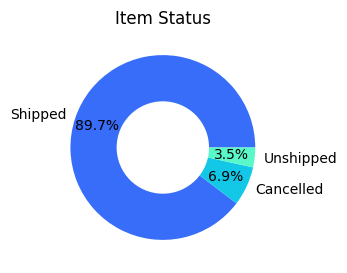

In [82]:

palette_color = sns.color_palette('rainbow')
dm['item_status'].value_counts().sort_values(ascending = False).head(3).plot(kind='pie',figsize=(5,3),autopct='%1.1f%%',pctdistance=0.75,colors=palette_color,ylabel='',title='Item Status')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

**Fulfillment channel vs sales channel vs order channel**

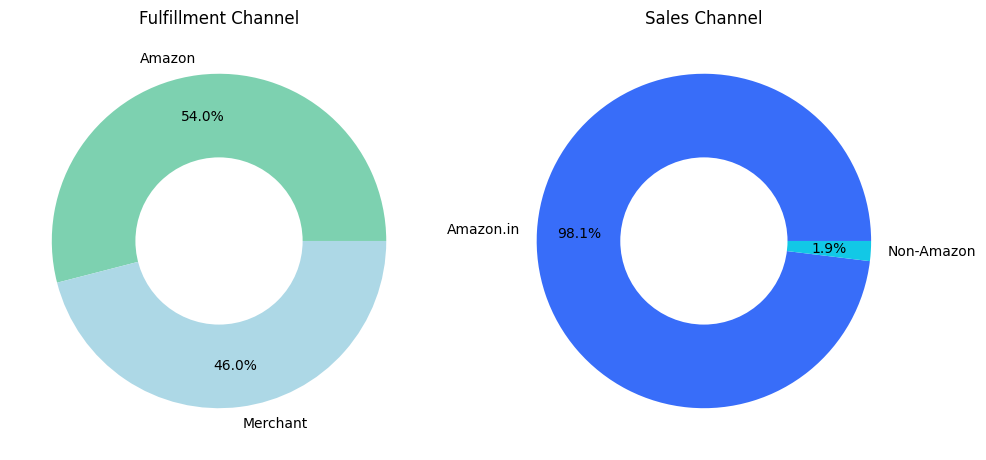

In [83]:

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
palette_color = sns.color_palette('rainbow')
dm['fulfillment_channel'].value_counts().sort_values(ascending = False).head(3).plot(kind='pie', autopct='%1.1f%%', pctdistance=0.75, colors=['#7dd1b0' , 'lightblue'], ylabel='', title='Fulfillment Channel', ax=axs[0])
centre_circle = plt.Circle((0,0),0.50,fc='white')
axs[0].add_artist(centre_circle)

dm['sales_channel'].value_counts().sort_values(ascending = False).head(3).plot(kind='pie', autopct='%1.1f%%', pctdistance=0.75, colors=palette_color, ylabel='', title='Sales Channel', ax=axs[1])
centre_circle = plt.Circle((0,0),0.50,fc='white')
axs[1].add_artist(centre_circle)
fig.tight_layout()
plt.show()

In [85]:
dm.sku.str.upper()
sofa_dm = dm[dm['sku'].str.contains('sofa' , case = False)]

sofa_sales = dm.groupby('sku')['Revenue'].sum() \
                 .loc[lambda x: x.index.str.contains('sofa', case=False)] \
                 .sort_values(ascending=False) \




***Volume Trend for Amazon ***

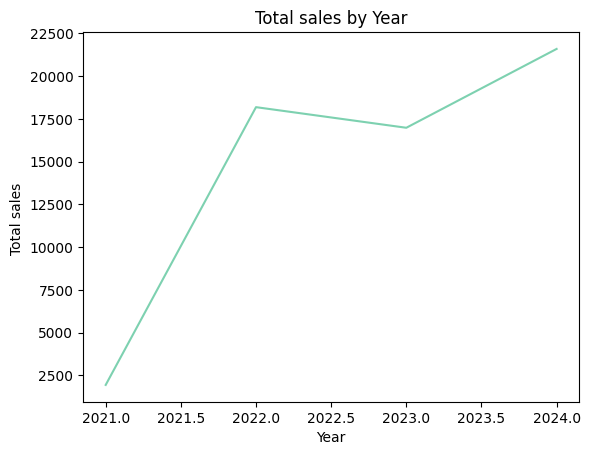

In [ ]:
ax = sns.lineplot(x=dm.groupby('year')['quantity'].sum().index, y=dm.groupby('year')['quantity'].sum().values , color = '#7dd1b0')
plt.xlabel('Year')
plt.ylabel('Total sales ')
plt.title('Total sales by Year')
for labels in ax.containers:
    ax.bar_label(labels)


plt.show()

**Revenue trend for Amazon**

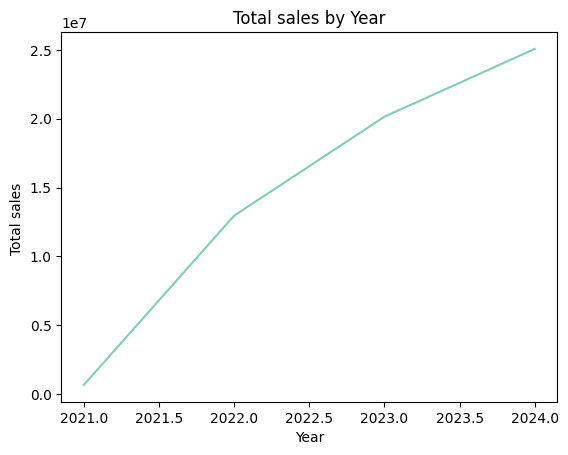

In [87]:

yearly_profit = dm.groupby('year')['Revenue'].sum()
sns.lineplot(x=yearly_profit.index, y=yearly_profit.values , color = '#7dd1b0')
plt.xlabel('Year')
plt.ylabel('Total sales ')
plt.title('Total sales by Year')


plt.show()

In [90]:
dm.columns

Index(['amazon_order_id', 'merchant_order_id', 'purchase_date',
       'last_updated_date', 'order_status', 'fulfillment_channel',
       'sales_channel', 'order_channel', 'url', 'ship_service_level',
       'product_name', 'sku', 'asin', 'item_status', 'quantity', 'currency',
       'item_price', 'item_tax', 'shipping_price', 'shipping_tax',
       'gift_wrap_price', 'gift_wrap_tax', 'item_promotion_discount',
       'ship_promotion_discount', 'ship_city', 'ship_state',
       'ship_postal_code', 'ship_country', 'promotion_ids',
       'is_business_order', 'purchase_order_number', 'price_designation',
       'fulfilled_by', 'is_iba', 'is_replacement_order', 'is_exchange_order',
       'original_order_id', 'account_id', 'create_time', 'update_time', 'year',
       'month', 'hour', 'total_tax', 'total_promotion_discount', 'Revenue'],
      dtype='object')

***Operational Efficiency for Uttar Pradesh and Delhi ***

In [91]:
filtered_data_1 = dm[dm['ship_state'] == 'UTTAR PRADESH']

In [93]:
filtered_data_1.quantity.sum()

5238.0

In [94]:
dm.quantity.sum()

58699.0

In [95]:
filtered_data_1.shape

(5900, 46)

In [96]:
item_status_counts = filtered_data_1['item_status'].value_counts().sort_values(ascending = False).head(3)

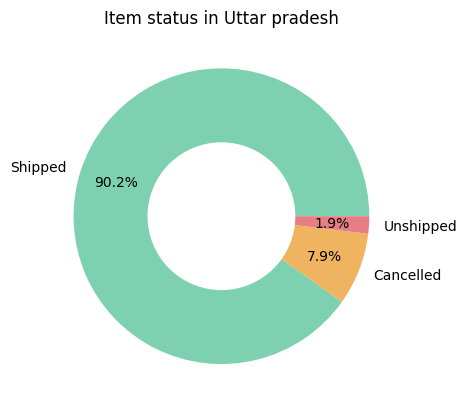

In [97]:
item_status_counts.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.75, ylabel='', title='Item Status' , colors = ['#7dd1b0' ,  '#f0b35f', '#e67e83'])
plt.title('Item status in Uttar pradesh')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [98]:
filtered_data_3 = dm[dm['ship_state'] == 'DELHI']

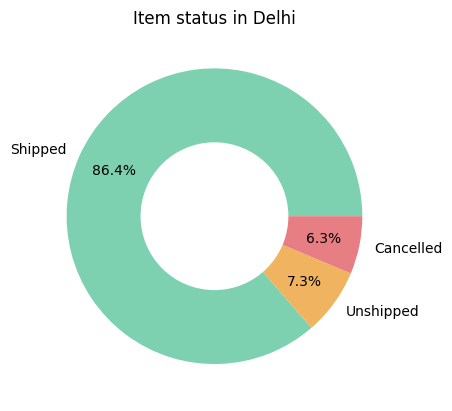

In [99]:

filtered_data_3 = dm[dm['ship_state'] == 'DELHI']
item_status_count = filtered_data_3['item_status'].value_counts().sort_values(ascending = False).head(3)
item_status_count.plot(kind='pie', autopct='%1.1f%%', pctdistance=0.75, ylabel='', title='Item Status' , colors = ['#7dd1b0' ,  '#f0b35f', '#e67e83'])
plt.title('Item status in Delhi')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


In [100]:
filtered_data_3.quantity.sum()

8016.0

In [104]:

filtered_data_1.quantity.sum()

5238.0

**State wise demand for Sofa covers(By quantity)**

In [105]:

filtered_data_4 = dm[dm['sku'].str.upper().str.contains('SOFA' , case = False)]

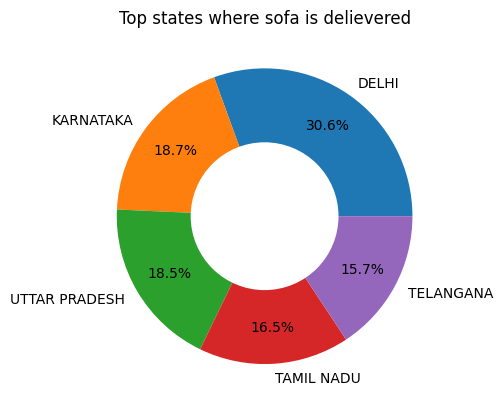

In [106]:
filtered_data_4.groupby('ship_state')['quantity'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='')
plt.title( 'Top states where sofa is delievered')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**State wise demand for Sofa covers(By Revenue)**

<ipython-input-107-fc307b910fc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_4['total_promotion_discount'] = filtered_data_4['item_promotion_discount']*filtered_data_4['quantity'] + filtered_data_4['ship_promotion_discount']*filtered_data_4['quantity']
<ipython-input-107-fc307b910fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_4['Revenue'] = (filtered_data_4['item_price'] * filtered_data_4['quantity'] ) - filtered_data_4['total_promotion_discount']


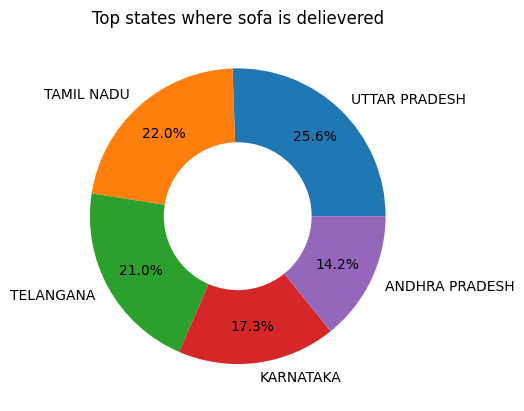

In [107]:
filtered_data_4['total_promotion_discount'] = filtered_data_4['item_promotion_discount']*filtered_data_4['quantity'] + filtered_data_4['ship_promotion_discount']*filtered_data_4['quantity']
filtered_data_4['Revenue'] = (filtered_data_4['item_price'] * filtered_data_4['quantity'] ) - filtered_data_4['total_promotion_discount']
filtered_data_4.groupby('ship_state')['Revenue'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='')
plt.title( 'Top states where sofa is delievered')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

***Item Price vs Quantity for Uttar Pradesh and Delhi ***

In [108]:
filtered_data_1.groupby('item_price')['quantity']

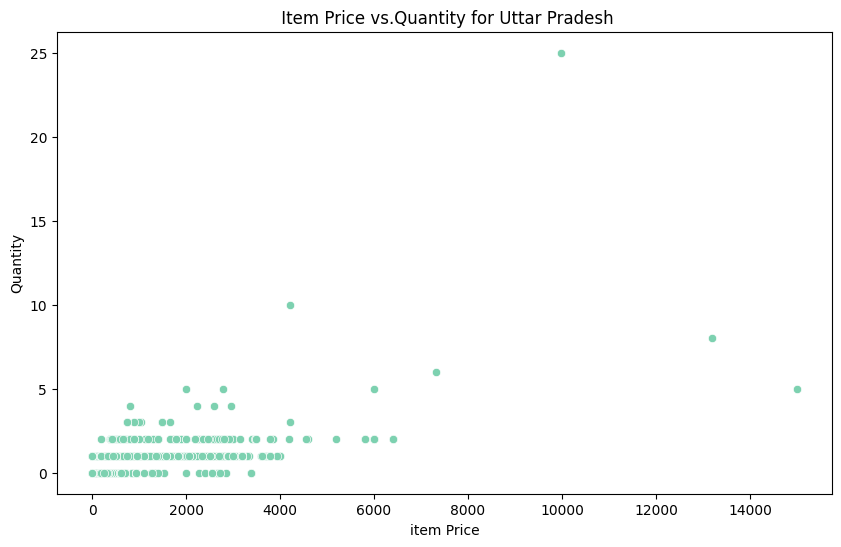

In [109]:
plt.figure(figsize=(10 , 6))
sns.scatterplot(x='item_price', y='quantity', data=filtered_data_1 , color = '#7dd1b0')
plt.title(' Item Price vs.Quantity for Uttar Pradesh')
plt.xlabel('item Price')
plt.ylabel('Quantity')
plt.show()


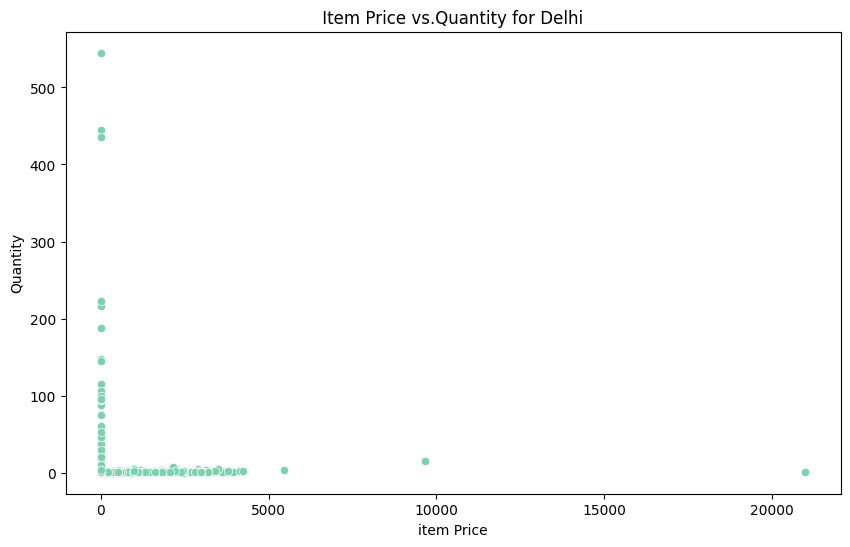

In [110]:
plt.figure(figsize=(10 , 6))
sns.scatterplot(x='item_price', y='quantity', data=filtered_data_3 , color = '#7dd1b0')
plt.title(' Item Price vs.Quantity for Delhi ')
plt.xlabel('item Price')
plt.ylabel('Quantity')
plt.show()


# **MEESHO**

In [112]:
td = pd.read_csv('/content/drive/MyDrive/socbiz/Meesho_Orders.csv')

In [113]:
td.head()

,ReasonforCreditEntry,SubOrderNo,OrderDate,CustomerState,ProductName,SKU,Size,Quantity,SupplierListedPrice,SupplierDiscountedPrice,PacketId,account_id,create_time,update_time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,6,2024-04-23 07:11:55,2024-04-23 07:11:55
1,DELIVERED,100029636931_1,2023-08-22 00:00:00,West Bengal,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,1049,1049.0,NaN,6,2024-01-23 15:18:36,2024-01-23 15:18:36
2,DELIVERED,100030804488_1,2024-03-17 00:00:00,Tamil Nadu,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLEND_GEOMETRIC,Free Size,1,1044,940.0,NaN,7,2024-03-18 11:32:19,2024-03-18 11:32:19
3,DELIVERED,100035318894_1,2023-10-06 00:00:00,Madhya Pradesh,Furshine Universal Triple Seater Sofa Cover Bi...,TRIPLE_SOFA_COVER_BLA_PRISM,Free Size,1,999,900.0,NaN,6,2024-01-23 15:21:21,2024-01-23 15:21:21
4,DELIVERED,100066941702_1,2023-12-03 00:00:00,Bihar,Furshine Single Seater Sofa Cover Big Elastici...,SINGLE_SOFA_COVER_BLU_DIAMOND_3,Free Size,1,700,700.0,NaN,7,2024-01-23 17:00:54,2024-01-23 17:00:54


In [114]:
td.shape

(86328, 14)

In [115]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86328 entries, 0 to 86327
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ReasonforCreditEntry     86327 non-null  object 
 1   SubOrderNo               86327 non-null  object 
 2   OrderDate                86327 non-null  object 
 3   CustomerState            43885 non-null  object 
 4   ProductName              86327 non-null  object 
 5   SKU                      86326 non-null  object 
 6   Size                     86327 non-null  object 
 7   Quantity                 86328 non-null  int64  
 8   SupplierListedPrice      86328 non-null  int64  
 9   SupplierDiscountedPrice  86328 non-null  float64
 10  PacketId                 0 non-null      float64
 11  account_id               86328 non-null  int64  
 12  create_time              86328 non-null  object 
 13  update_time              86328 non-null  object 
dtypes: float64(2), int64(3

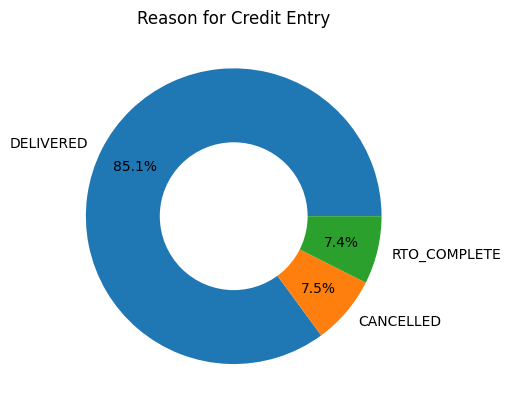

In [116]:
td.ReasonforCreditEntry.str.upper().value_counts().sort_values(ascending = False).head(3).plot(kind = 'pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='',title='Reason for Credit Entry')
plt.title('Reason for Credit Entry')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

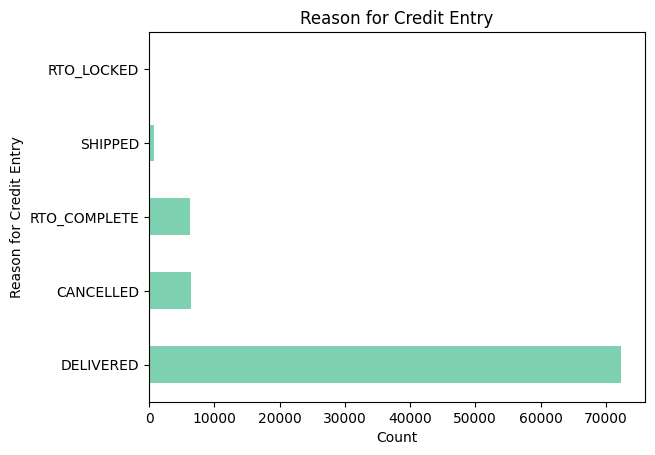

In [117]:
td.ReasonforCreditEntry.str.upper().value_counts().sort_values(ascending = False).head(5).plot(kind = 'barh' , color = '#7dd1b0')
plt.title('Reason for Credit Entry')
plt.xlabel('Count')
plt.ylabel('Reason for Credit Entry')

plt.show()

In [118]:
td.CustomerState.unique()

array([nan, 'West Bengal', 'Tamil Nadu', 'Madhya Pradesh', 'Bihar',
       'telangana', 'Karnataka', 'Uttar Pradesh', 'Assam', 'Telangana',
       'Andhra Pradesh', 'Jharkhand', 'Meghalaya', 'Gujarat', 'Haryana',
       'Delhi', 'Rajasthan', 'Kerala', 'Odisha', 'Maharashtra',
       'Jammu & Kashmir', 'Uttarakhand', 'Pudhucherry', 'karnataka',
       'Chhattisgarh', 'Andaman & Nicobar Islands', 'uttar pradesh',
       'Tamilnadu', 'Himachal Pradesh', 'Tripura', 'tamilnadu',
       'Arunachal Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Puducherry', 'maharashtra', 'Goa', 'Kolkata', 'delhi',
       'Andaman and Nicobar Islands', 'Tamil nadu', 'Uttarpradesh',
       'Nagaland', 'Manipur', 'assam', 'chhattisgarh', 'Sikkim',
       'andhra pradesh', 'Up', 'bihar', 'thamilnadu', 'MAHARASHTRA',
       'TAMIL NADU', 'Andhra pradesh', 'Daman & Diu', 'punjab', 'manipur',
       'TAMILNADU', 'J&k', 'Ladakh', 'west Bengal', 'Rajsthan', 'odisha',
       'west  bengal', 'Others', 'Andhraprad

In [119]:
filtered_data_6 = td[td['CustomerState'].isin(['Uttar Pradesh', 'U. P', 'Uttarpradesh', 'u.p.', 'uttar pradesh', 'Uttar pradesh', 'Up', 'UP', 'uttarpradesh'])]

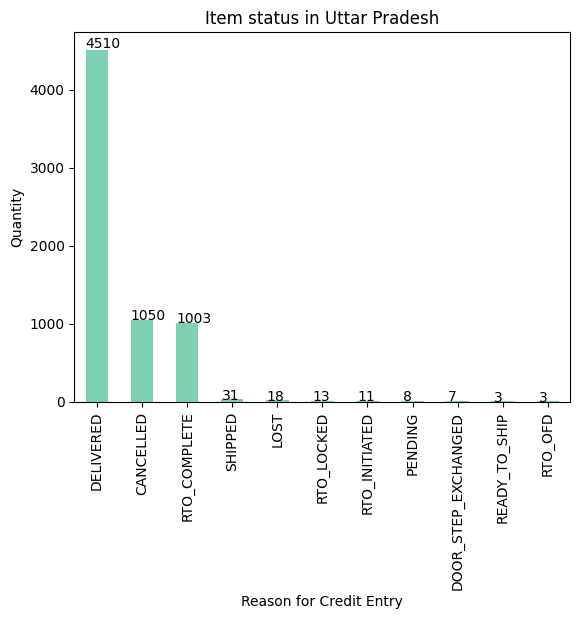

In [120]:

filtered_data_6.ReasonforCreditEntry.str.upper()
ax =filtered_data_6.groupby('ReasonforCreditEntry')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar' , color = '#7dd1b0')
plt.title( 'Item status in Uttar Pradesh')
plt.xlabel('Reason for Credit Entry')
plt.ylabel('Quantity')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [121]:
filtered_data_7 = td[td['CustomerState'].isin(['Tamil NADU', 'Tamil  Nadu' , 'TamilNadu' , 'tamil nadu' , 'TAMILNADU' , 'tamil nadu' , 'TAMIL NDAU' , 'Tamil Nadu' , 'Tamilnadu', 'Tamil nadu' , 'thamilnadu'])]

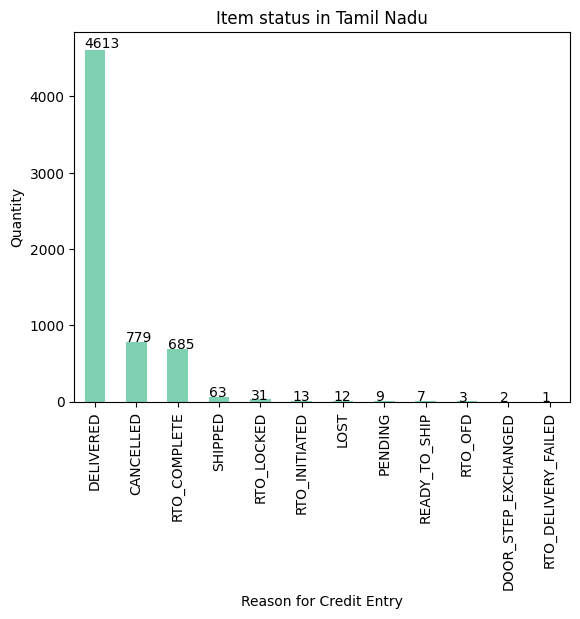

In [122]:
ax =filtered_data_7.groupby('ReasonforCreditEntry')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar' , color = '#7dd1b0')
plt.title( 'Item status in Tamil Nadu')
plt.xlabel('Reason for Credit Entry')
plt.ylabel('Quantity')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [123]:




td.describe()

,Quantity,SupplierListedPrice,SupplierDiscountedPrice,PacketId,account_id
count,86328.000000,86328.000000,86328.000000,0.0,86328.000000
mean,1.086693,709.828885,714.767915,NaN,7.078804
std,0.326013,342.385728,355.920149,NaN,0.945274
min,0.000000,0.000000,-136.550000,NaN,6.000000
25%,1.000000,410.000000,410.000000,NaN,6.000000
50%,1.000000,700.000000,700.000000,NaN,7.000000
75%,1.000000,1039.000000,1025.000000,NaN,8.000000
max,16.000000,3567.000000,3640.580000,NaN,22.000000


In [126]:

filtered_data_5 = td[td['SKU'].str.upper().str.contains('SOFA', case=False, na=True)]

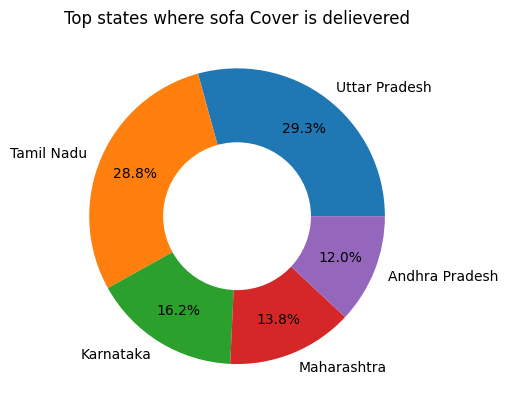

In [127]:
filtered_data_5.groupby('CustomerState')['Quantity'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='' )
plt.title( 'Top states where sofa Cover is delievered')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

<ipython-input-128-96788249e097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_5['Revenue'] = filtered_data_5['SupplierDiscountedPrice'] * filtered_data_5['Quantity']


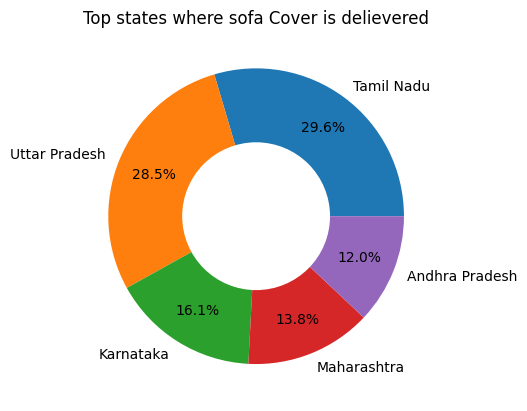

In [128]:
filtered_data_5['Revenue'] = filtered_data_5['SupplierDiscountedPrice'] * filtered_data_5['Quantity']
filtered_data_5.groupby('CustomerState')['Revenue'].sum().sort_values(ascending=False).head(5).plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='' )
plt.title( 'Top states where sofa Cover is delievered')
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [129]:
td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']
td.groupby('SKU')['Revenue'].value_counts().sort_values(ascending = False).head(10)

,,count
SKU,Revenue,
TRIPLE_SOFA_COVER_BLEND_GEOMETRIC,1049.00,3391
TRIPLE_SOFA_COVER_BLU_DIAMOND_3,1049.00,2168
TRIPLE_SOFA_COVER_BLEND_GEOMETRIC_2,1049.00,1130
TRIPLE_SOFA_COVER_BLU_DIAMOND_3,999.00,1094
KETTLE_NEW_PP,400.72,1008
SINGLE_SOFA_COVER_BLU_DIAMOND_3,700.00,912
SINGLE_SOFA_COVER_BLEND_GEOMETRIC_NEW1,700.00,881
1889386115_4,400.52,863
Kettle_N,499.00,811


In [130]:
td.SKU.str.upper()
td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']


sofa_td = td[td['SKU'].fillna('').str.contains('SOFA', case=False)]

sofa_sales_1 = td.groupby('SKU')['Revenue'].sum() \
                 .loc[lambda x: x.index.str.contains('SOFA', case=False)] \
                 .sort_values(ascending=False) \




In [131]:
sofa_sales_1.sum()

47364709.44

In [132]:
td.SKU.str.upper()
td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']


KETTLE_td = td[td['SKU'].fillna('').str.contains('KETTLE', case=False)]

KETTLE_sales_1 = td.groupby('SKU')['Revenue'].sum() \
                 .loc[lambda x: x.index.str.contains('KETTLE', case=False)] \
                 .sort_values(ascending=False) \






In [133]:
KETTLE_sales_1.sum()

2510825.2399999998

In [134]:
td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']
td['Revenue'].sum()

68641549.76

In [135]:
sofa_sales_1.sum() +KETTLE_sales_1.sum()

49875534.68

In [136]:
(sofa_sales_1.sum()+KETTLE_sales_1.sum())/td['Revenue'].sum() * 100

72.66085170627126

In [137]:
td.Quantity.sum()

93812

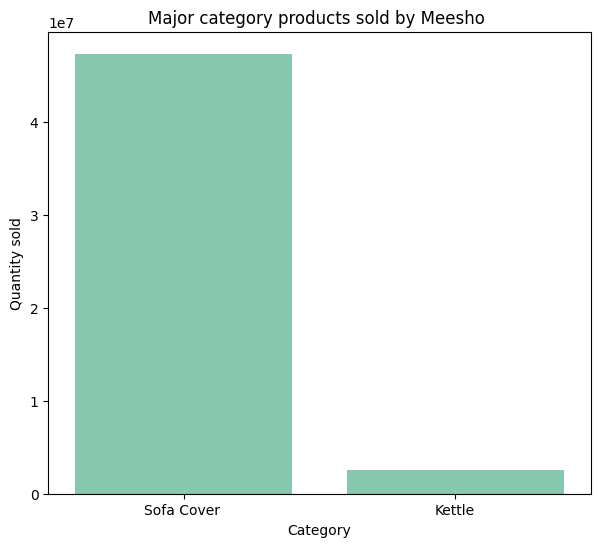

In [138]:

plt.figure(figsize=(7, 6))
sns.barplot(x=['Sofa Cover ' , 'Kettle'] , y = [sofa_sales_1.sum() ,KETTLE_sales_1.sum()] , color = '#7dd1b0')
plt.title('Major category products sold by Meesho ')
plt.xlabel('Category')
plt.ylabel('Quantity sold')
plt.show()

In [139]:
filtered_data = td[td['SKU'].str.contains('sofa|kettle', case=False, na=False)]

In [140]:
sku_summary = filtered_data.groupby('SKU').agg({
    'Quantity': 'sum',
    'SupplierListedPrice': 'mean',
    'SupplierDiscountedPrice': 'mean'
}).reset_index()

In [141]:
top_skus = sku_summary.sort_values(by='Quantity', ascending=False).head(10)

In [142]:
td.isnull().sum()

,0
ReasonforCreditEntry,1
SubOrderNo,1
OrderDate,1
CustomerState,42443
ProductName,1
SKU,2
Size,1
Quantity,0
SupplierListedPrice,0
SupplierDiscountedPrice,0


In [143]:
td.drop(['PacketId'] , axis =1 , inplace = True )

In [144]:
td.columns

Index(['ReasonforCreditEntry', 'SubOrderNo', 'OrderDate', 'CustomerState',
       'ProductName', 'SKU', 'Size', 'Quantity', 'SupplierListedPrice',
       'SupplierDiscountedPrice', 'account_id', 'create_time', 'update_time',
       'Revenue'],
      dtype='object')

In [145]:
td.OrderDate = pd.to_datetime(td.OrderDate)
month = td.OrderDate.dt.month
td['month'] = month

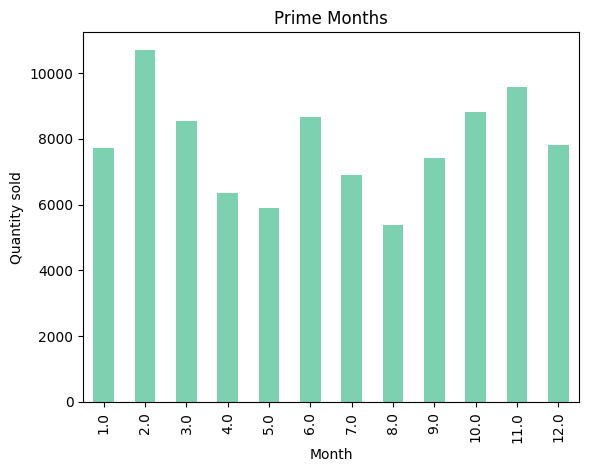

In [146]:
td.groupby('month')['Quantity'].sum().plot(kind = 'bar' , color = '#7dd1b0')
plt.title('Prime Months')
plt.xlabel('Month')
plt.ylabel('Quantity sold')
plt.show()

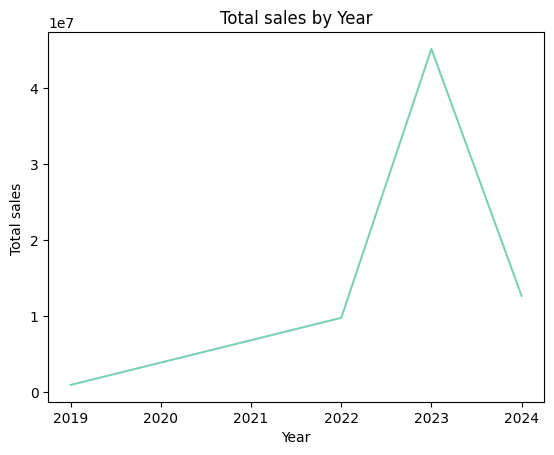

In [147]:

td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']
td.OrderDate = pd.to_datetime(td.OrderDate)
td['year'] = td.OrderDate.dt.year


sns.lineplot(x=td.groupby('year')['Revenue'].sum().index, y=td.groupby('year')['Revenue'].sum().values , color = '#7dd1b0')
plt.xlabel('Year')
plt.ylabel('Total sales ')
plt.title('Total sales by Year')


plt.show()

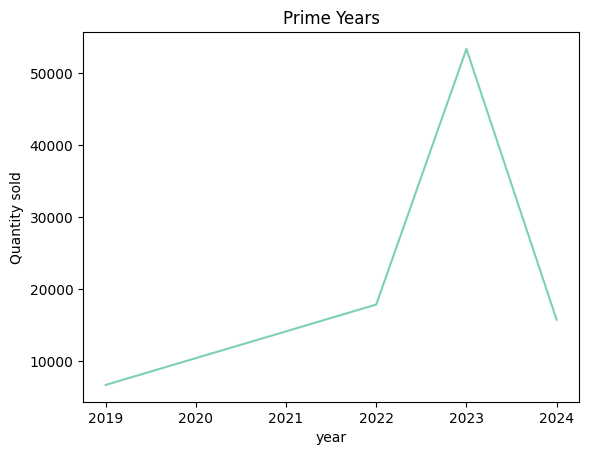

In [148]:
td.OrderDate = pd.to_datetime(td.OrderDate)
td['year'] = td.OrderDate.dt.year
td.groupby('year')['Quantity'].sum().plot(kind = 'line' , color = '#7dd1b0')
plt.title('Prime Years')
plt.xlabel( 'year')
plt.ylabel('Quantity sold')
plt.show()

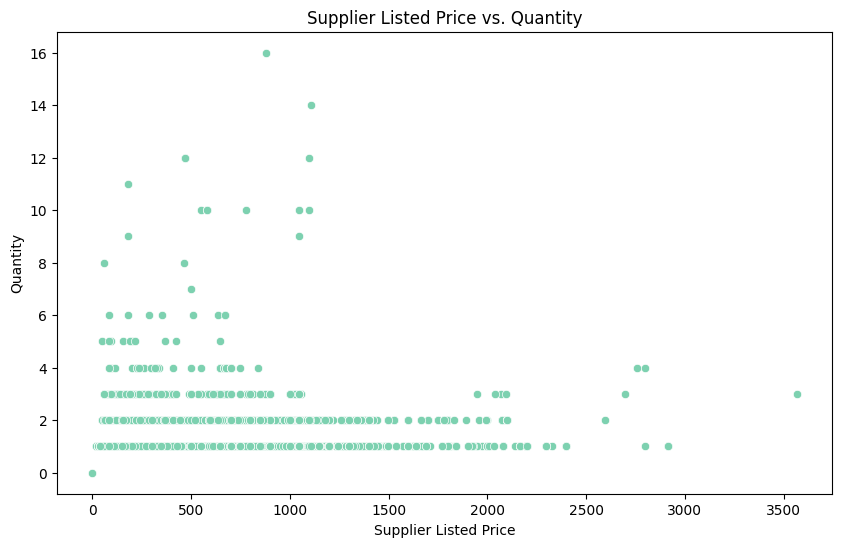

In [149]:
plt.figure(figsize=(10 , 6))
sns.scatterplot(x='SupplierListedPrice', y='Quantity', data=td , color = '#7dd1b0')
plt.title('Supplier Listed Price vs. Quantity')
plt.xlabel('Supplier Listed Price')
plt.ylabel('Quantity')
plt.show()




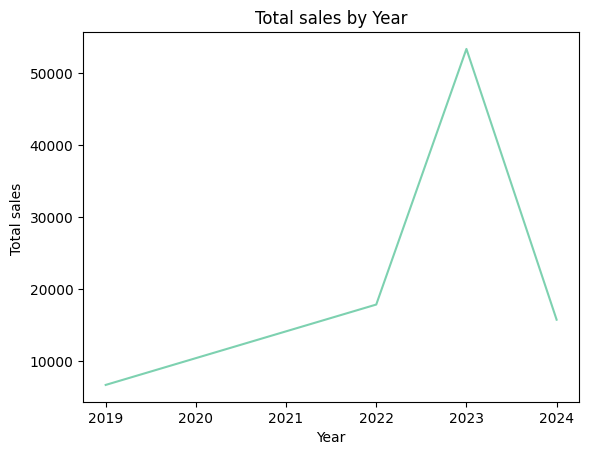

In [150]:

td['OrderDate'] = pd.to_datetime(td['OrderDate'])
td['year'] = td.OrderDate.dt.year

sns.lineplot(x=td.groupby('year')['Quantity'].sum().index, y=td.groupby('year')['Quantity'].sum().values , color = '#7dd1b0')
plt.xlabel('Year')
plt.ylabel('Total sales ')
plt.title('Total sales by Year')

plt.show()

In [151]:
td.columns

Index(['ReasonforCreditEntry', 'SubOrderNo', 'OrderDate', 'CustomerState',
       'ProductName', 'SKU', 'Size', 'Quantity', 'SupplierListedPrice',
       'SupplierDiscountedPrice', 'account_id', 'create_time', 'update_time',
       'Revenue', 'month', 'year'],
      dtype='object')

In [152]:
td.OrderDate = pd.to_datetime(td.OrderDate)
td.update_time = pd.to_datetime(td.update_time)

In [153]:
td.ReasonforCreditEntry.str.upper().value_counts()

,count
ReasonforCreditEntry,
DELIVERED,72390
CANCELLED,6385
RTO_COMPLETE,6313
SHIPPED,689
RTO_LOCKED,127
LOST,112
READY_TO_SHIP,88
RTO_INITIATED,87
PENDING,66


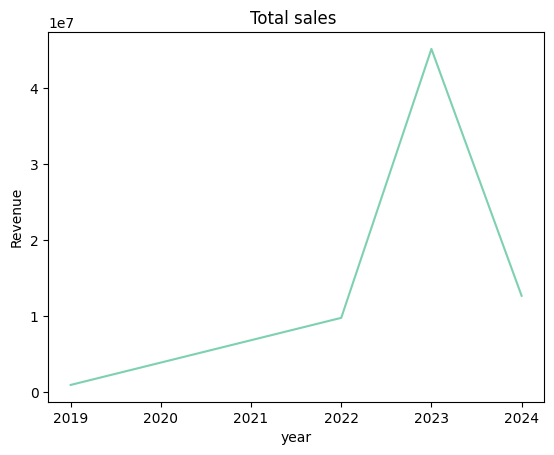

In [154]:
td.OrderDate = pd.to_datetime(td.OrderDate)
td['year'] = td.OrderDate.dt.year
td.groupby('year')['Revenue'].sum().plot(kind = 'line' , color = '#7dd1b0')
plt.title('Total sales ')
plt.xlabel( 'year')
plt.ylabel('Revenue')
plt.show()

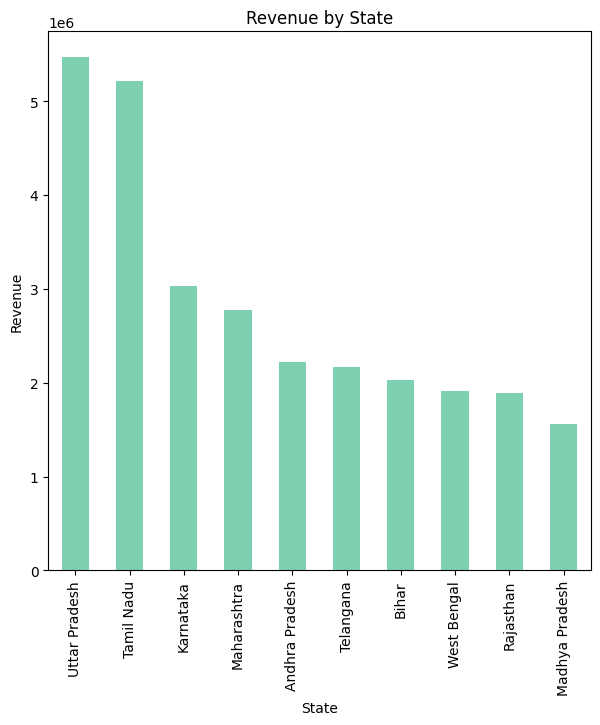

In [155]:
td['Revenue'] = td['SupplierDiscountedPrice'] * td['Quantity']
revenue_by_state = td.groupby('CustomerState')['Revenue'].sum().sort_values( ascending = False).head(10).plot(kind='bar',color='#7dd1b0' , figsize = (7,7))
plt.title('Revenue by State')
plt.xlabel('State')
plt.ylabel('Revenue')


plt.show()






Top 5 states with the highest KETTLE sales:
CustomerState
Uttar Pradesh     5469669.0
Tamil Nadu        5210944.0
Karnataka         3034925.0
Maharashtra       2777157.0
Andhra Pradesh    2224000.0
Name: Revenue, dtype: float64


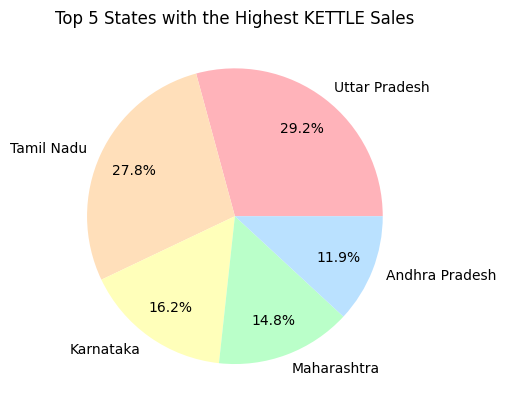

In [156]:

td['SKU'] = td['SKU'].fillna('').str.upper()
td['SKU'] = td['SKU'].apply(lambda x: 'KETTLE' if '' in x else x)


KETTLE_td = td[td['SKU'] == 'KETTLE']


KETTLE_sales_by_state = KETTLE_td.groupby('CustomerState')['Revenue'].sum().sort_values(ascending=False)


top_5_states = KETTLE_sales_by_state.head(5)

print("Top 5 states with the highest KETTLE sales:")
print(top_5_states)
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff']

top_5_states.plot(kind='pie' , autopct='%1.1f%%',pctdistance=0.75,ylabel='',title='Top 5 States with the Highest KETTLE Sales' , colors=colors)
plt.title('Top 5 States with the Highest KETTLE Sales')

plt.show()


***Industry analysis ***

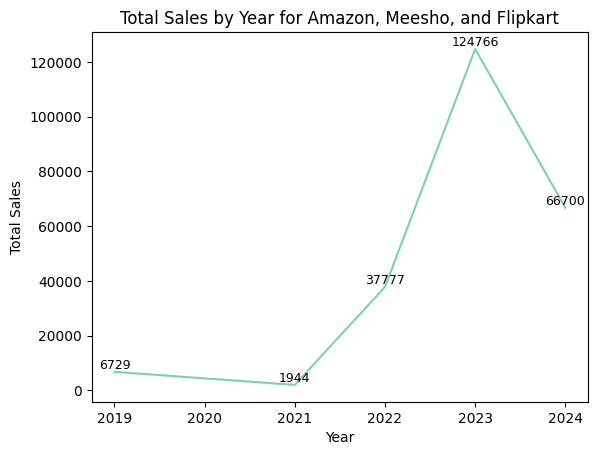

In [ ]:

total_quantity_amazon = dm.groupby('year')['quantity'].sum().reset_index()
total_quantity_meesho = df.groupby('year')['order_quantity'].sum().reset_index()
total_quantity_flipkart = td.groupby('year')['Quantity'].sum().reset_index()


total_quantity_amazon.columns = ['Year', 'Amazon Quantity']
total_quantity_meesho.columns = ['Year', 'Meesho Quantity']
total_quantity_flipkart.columns = ['Year', 'Flipkart Quantity']


total_quantity = pd.merge(total_quantity_amazon, total_quantity_meesho, on='Year', how='outer')
total_quantity = pd.merge(total_quantity, total_quantity_flipkart, on='Year', how='outer')


total_quantity.fillna(0, inplace=True)

total_quantity['Total Quantity'] = (total_quantity['Amazon Quantity'] +
                                     total_quantity['Meesho Quantity'] +
                                     total_quantity['Flipkart Quantity'])

sns.lineplot(data=total_quantity, x='Year', y='Total Quantity', color='#7dd1b0')

for i, row in total_quantity.iterrows():
    plt.text(row['Year'], row['Total Quantity'],
             f"{int(row['Total Quantity'])}",
             ha='center', va='bottom', fontsize=9)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year for Amazon, Meesho, and Flipkart')

plt.show()


***Describing all three datasets ***

In [ ]:
dm.describe()

,purchase_date,last_updated_date,url,quantity,item_price,item_tax,shipping_price,shipping_tax,gift_wrap_price,gift_wrap_tax,item_promotion_discount,ship_promotion_discount,is_iba,account_id,year,month,hour,total_tax,total_promotion_discount,Revenue
count,46292,46292,0.0,46292.000000,46292.000000,46292.000000,46292.000000,46292.000000,46292.000000,46292.0,46292.000000,46292.000000,46227.000000,46226.000000,46292.000000,46292.000000,46292.000000,46226.000000,46226.000000,46226.000000
mean,2023-05-07 11:40:42.908407552,2023-05-10 23:22:27.436792576,NaN,1.268016,1160.356578,65.120726,13.685206,0.218733,0.042772,0.0,2.991360,10.834277,0.000108,4.125708,2022.856023,6.429059,10.466863,69.832970,19.243596,1272.928808
min,2021-09-01 03:45:56,2021-09-01 06:22:07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,2021.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-08-24 12:11:50,2022-08-29 06:54:54.750000128,NaN,1.000000,249.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,2022.000000,4.000000,6.000000,0.000000,0.000000,199.000000
50%,2023-05-23 17:25:01,2023-05-27 07:39:52,NaN,1.000000,649.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.000000,2023.000000,6.000000,10.000000,0.000000,0.000000,629.000000
75%,2024-01-26 15:22:22,2024-01-30 14:34:20.750000128,NaN,1.000000,2013.000000,60.860000,40.000000,0.000000,0.000000,0.0,0.000000,40.000000,0.000000,4.000000,2024.000000,10.000000,15.000000,60.860000,40.000000,2069.000000
max,2024-06-24 05:30:09,2024-06-24 05:55:25,NaN,975.000000,29990.000000,3203.380000,1500.000000,15.250000,30.000000,0.0,8097.300000,1000.000000,5.000000,18.000000,2024.000000,12.000000,23.000000,38037.500000,84973.000000,463600.000000
std,NaN,NaN,NaN,10.263873,1153.799560,131.457954,24.844461,1.429094,1.131971,0.0,50.421402,21.582740,0.023255,2.012984,0.891192,3.403696,5.229742,340.017534,452.213810,4523.362802


In [ ]:
td.describe()

,OrderDate,Quantity,SupplierListedPrice,SupplierDiscountedPrice,account_id,update_time,Revenue,month,year
count,86327,86328.000000,86328.000000,86328.000000,86328.000000,86328,86328.000000,86327.000000,86327.000000
mean,2023-03-07 20:24:24.070337024,1.086693,709.828885,714.767915,7.078804,2024-02-01 17:57:46.665890560,795.124986,6.499716,2022.684386
min,2019-01-19 00:00:00,0.000000,0.000000,-136.550000,6.000000,2024-01-23 15:16:53,-136.550000,1.000000,2019.000000
25%,2022-12-11 00:00:00,1.000000,410.000000,410.000000,6.000000,2024-01-23 16:56:33,410.000000,3.000000,2022.000000
50%,2023-06-24 00:00:00,1.000000,700.000000,700.000000,7.000000,2024-01-23 17:04:31,764.370000,6.000000,2023.000000
75%,2023-11-04 00:00:00,1.000000,1039.000000,1025.000000,8.000000,2024-01-23 17:25:00,1049.000000,10.000000,2023.000000
max,2024-06-24 00:00:00,16.000000,3567.000000,3640.580000,22.000000,2024-06-24 06:35:54,21843.480000,12.000000,2024.000000
std,NaN,0.326013,342.385728,355.920149,0.945274,NaN,553.658611,3.590951,1.187274


In [ ]:
df.describe()

,order_date,order_approval_date,order_quantity,order_cancellation_date,order_return_approval_date,deliver_by_date,order_delivery_date,account_id,month,hour,year
count,83667,83243,83667.000000,8643,11955,81977,61202,83667.000000,83667.000000,83667.000000,83667.000000
mean,2023-10-18 17:30:28.219955712,2023-10-19 02:11:11.781579264,1.020773,2023-10-20 01:12:32.594006784,2024-02-07 12:13:58.973400320,2023-10-30 03:33:39.244422400,2023-10-29 20:27:08.182085632,1.840869,6.201943,13.888953,2023.325373
min,2022-07-28 00:00:00,2022-07-28 00:00:00,1.000000,2022-12-29 09:30:44,2023-01-28 12:55:04,2022-12-30 00:00:00,2022-12-30 00:00:00,1.000000,1.000000,0.000000,2022.000000
25%,2023-07-09 19:43:22.500000,2023-07-10 19:14:40.500000,1.000000,2023-07-21 00:35:22.500000,2023-12-11 20:15:32.500000,2023-07-23 00:00:00,2023-07-26 00:00:00,2.000000,3.000000,10.000000,2023.000000
50%,2023-10-24 08:24:56,2023-10-24 18:25:57,1.000000,2023-10-15 11:15:53,2024-02-05 23:55:55,2023-11-02 00:00:00,2023-11-03 00:00:00,2.000000,6.000000,14.000000,2023.000000
75%,2024-02-09 00:38:34.500000,2024-02-09 13:14:48,1.000000,2024-01-27 20:58:00.500000,2024-04-03 11:06:28.500000,2024-02-15 00:00:00,2024-02-13 00:00:00,2.000000,10.000000,19.000000,2024.000000
max,2024-06-22 23:53:00,2024-06-22 23:53:00,8.000000,2024-06-22 18:51:00,2024-06-21 17:47:00,2024-07-27 00:00:00,2024-06-22 00:00:00,14.000000,12.000000,23.000000,2024.000000
std,NaN,NaN,0.160300,NaN,NaN,NaN,NaN,0.841653,3.556981,6.448434,0.509576
